# Lead Score - Case Study

## Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives
There are quite a few goals for this case study.

-  Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


## 1. Importing Libries

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2. Data Understanding and Collection:
-  Load the data.
-  Understand the data structure, types, and formats.

In [3]:
# Load the data
file_path = r'C:\Users\Jyoti Mishra\Desktop\Leads.csv'
leads_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads_df.shape

(9240, 37)

**The dataset contains 9240 entries with 37 columns.**

## 3. Data Preprocessing:
-  Handle missing values.
-  Remove duplicates.
-  Handle outliers.

In [7]:
# Checking for missing values in the dataset
missing_values = leads_df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

Lead Source                                        36
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
dtype: int64

-  Drop columns with more than 40% missing values.
-  Impute missing values for numerical columns using median.
-  Impute missing values for categorical columns using mode.

In [8]:
# Converting all the values to lower case
leads_df = leads_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [9]:
# Remove duplicates, if any
leads_df = leads_df.drop_duplicates()

In [10]:
# Replacing 'Select' with NaN (Since it means no option is selected)
leads_df = leads_df.replace('select',np.nan)

In [11]:
# Dropping columns with more than 40% missing values
threshold = len(leads_df) * 0.4
leads_df = leads_df.dropna(thresh=threshold, axis=1)

# List of remaining columns after dropping
remaining_columns = leads_df.columns

# Identifying numerical and categorical columns
numerical_cols = leads_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = leads_df.select_dtypes(include=['object']).columns

# Imputing missing values for numerical columns using median
leads_df[numerical_cols] = leads_df[numerical_cols].fillna(leads_df[numerical_cols].median())

# Imputing missing values for categorical columns using mode
for col in categorical_cols:
    leads_df[col] = leads_df[col].fillna(leads_df[col].mode()[0])

# Dropping any rows that still contain missing values
leads_df = leads_df.dropna()

# Verify that there are no more missing values
missing_values_after = leads_df.isnull().sum().sum()

missing_values_after, leads_df.shape

(0, (9240, 35))

In [12]:
# Identify outliers using IQR method
def treat_outliers(col):
    Q1 = leads_df[col].quantile(0.25)
    Q3 = leads_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    leads_df[col] = leads_df[col].clip(lower=lower_bound, upper=upper_bound)

# Apply outlier treatment to numerical columns
for col in numerical_cols:
    treat_outliers(col)

In [13]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.0
mean,617188.435606,0.385390,3.217424,487.698268,2.255105,14.0,16.0
std,23405.995698,0.486714,2.860471,548.021466,1.779471,0.0,0.0
min,579533.000000,0.000000,0.000000,0.000000,0.000000,14.0,16.0
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.0,16.0
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.0,16.0
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,14.0,16.0
max,660737.000000,1.000000,11.000000,2272.000000,6.000000,14.0,16.0


In [14]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        12
Total Time Spent on Website                      1731
Page Views Per Visit                               91
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [15]:
# Finding the null percentages across columns
round(leads_df.isnull().sum()/len(leads_df.index),2)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [16]:
leads_df["Country"].value_counts()

Country
india                   8953
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malays

In [17]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    else:
        category = "outside india"
    return category

leads_df['Country'] = leads_df.apply(lambda x:slots(x['Country']), axis = 1)
leads_df['Country'].value_counts()

Country
india            8953
outside india     287
Name: count, dtype: int64

In [18]:
leads_df['Country'].head()

0    india
1    india
2    india
3    india
4    india
Name: Country, dtype: object

In [19]:
# To familiarize all the categorical values
for column in leads_df:
    print(leads_df[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------
Lead Origin
landing page submission    4886
api                        3580
lead add form               718
lead import     

## 4. Exploratory Data Analysis (EDA)
### 4.1 UNIVARIATE AND BIVARIATE

-  **a.) Converted**

Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)


In [20]:
Converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

38.53896103896104

**The lead conversion rate is 39%.**

-  **b.) Lead Origin**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'api'),
  Text(1, 0, 'landing page submission'),
  Text(2, 0, 'lead add form'),
  Text(3, 0, 'lead import'),
  Text(4, 0, 'quick add form')])

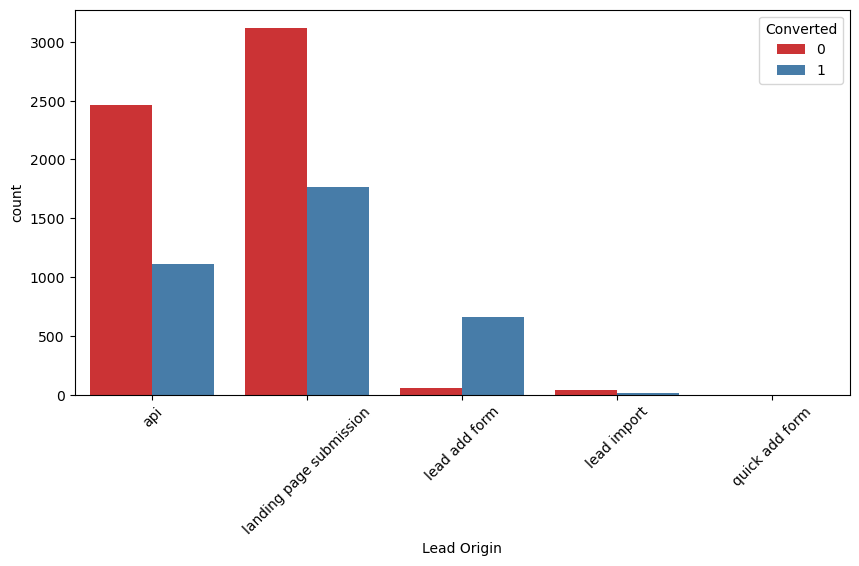

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 45)

**Inference :**
-  API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
-  Lead Add Form has more than 90% conversion rate but count of lead are not very high.
-  Lead Import and quick add form are very less in count.

**To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.**

-  **c.) Lead Source**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'olark chat'),
  Text(1, 0, 'organic search'),
  Text(2, 0, 'direct traffic'),
  Text(3, 0, 'google'),
  Text(4, 0, 'referral sites'),
  Text(5, 0, 'welingak website'),
  Text(6, 0, 'reference'),
  Text(7, 0, 'facebook'),
  Text(8, 0, 'blog'),
  Text(9, 0, 'pay per click ads'),
  Text(10, 0, 'bing'),
  Text(11, 0, 'social media'),
  Text(12, 0, 'welearn'),
  Text(13, 0, 'click2call'),
  Text(14, 0, 'live chat'),
  Text(15, 0, 'welearnblog_home'),
  Text(16, 0, 'youtubechannel'),
  Text(17, 0, 'testone'),
  Text(18, 0, 'press_release'),
  Text(19, 0, 'nc_edm')])

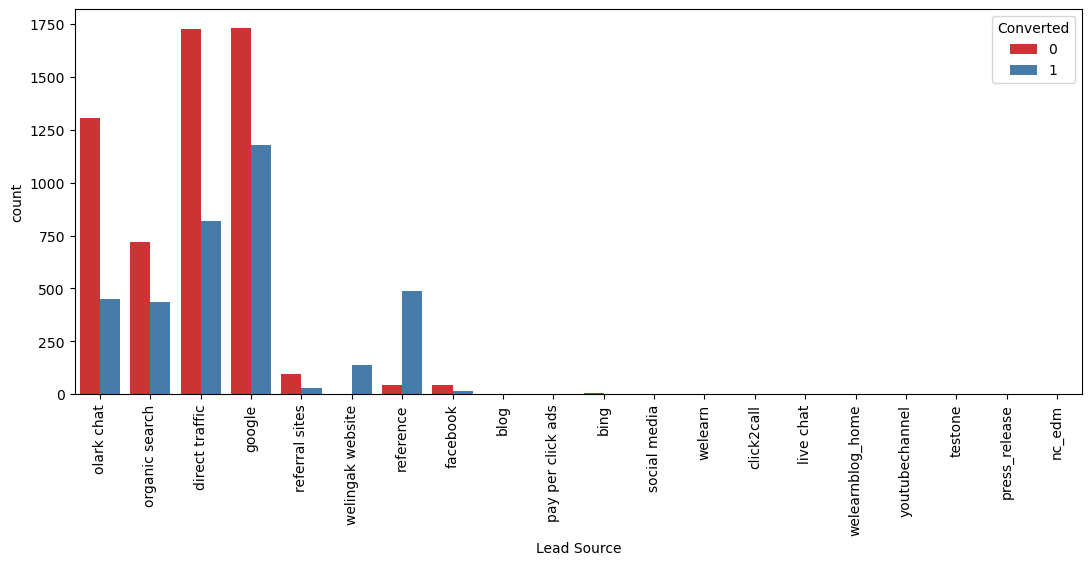

In [22]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_df, palette='Set1')
plt.xticks(rotation = 90)

**Inference**
-  Google and Direct traffic generates maximum number of leads.
-  Conversion Rate of reference leads and leads through welingak website is high.

**To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.**



**d.)Do not Email**


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

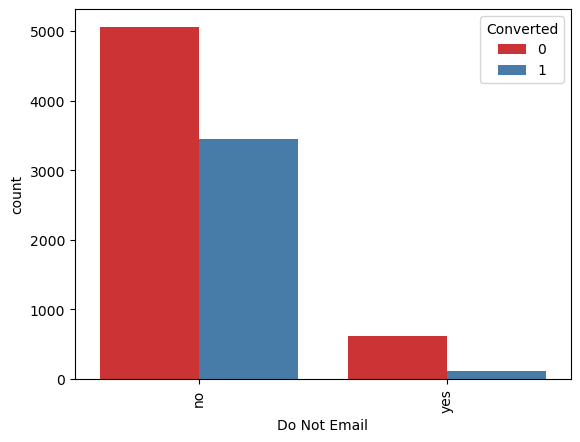

In [23]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
Most entries are 'No'. No Inference can be drawn with this parameter.

**e.) Do not call**

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

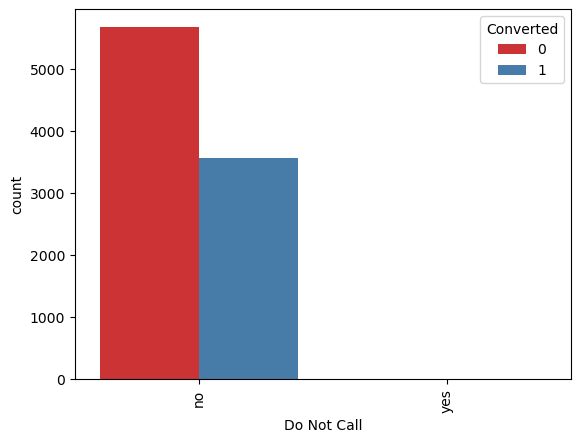

In [24]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
Most entries are 'No'. No Inference can be drawn with this parameter.

**f.) TotalVisits**

In [25]:
leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.217424
std         2.860471
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        11.000000
max        11.000000
Name: TotalVisits, dtype: float64

<Axes: >

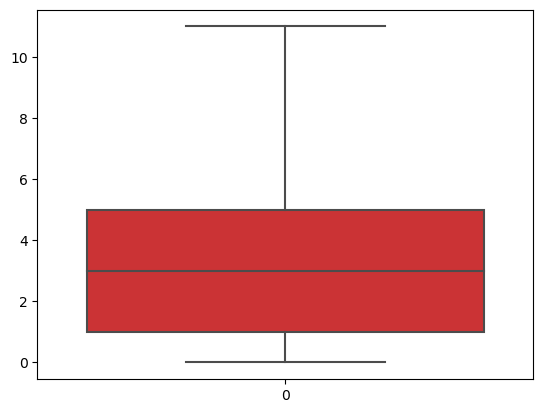

In [26]:
sns.boxplot(leads_df['TotalVisits'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

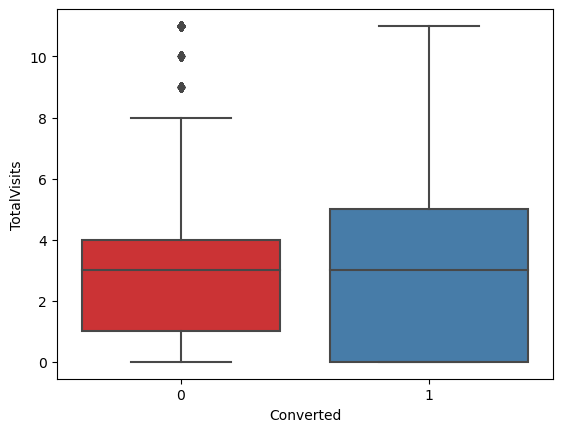

In [27]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df,palette='Set1')

**Inference:**
-  Median for converted and not converted leads are the same.

**Nothing can be concluded on the basis of Total Visits.**

**g.) Total Time Spent on Website**

In [28]:
leads_df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: >

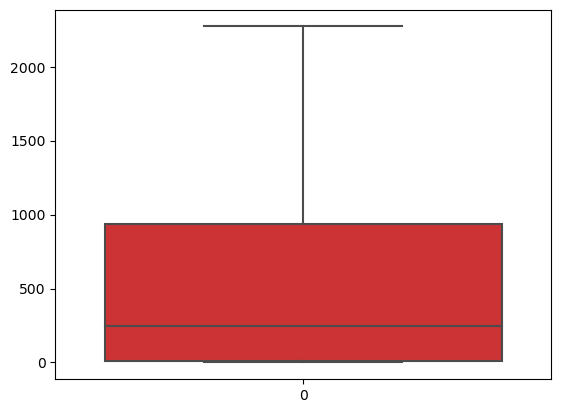

In [29]:
sns.boxplot(leads_df['Total Time Spent on Website'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

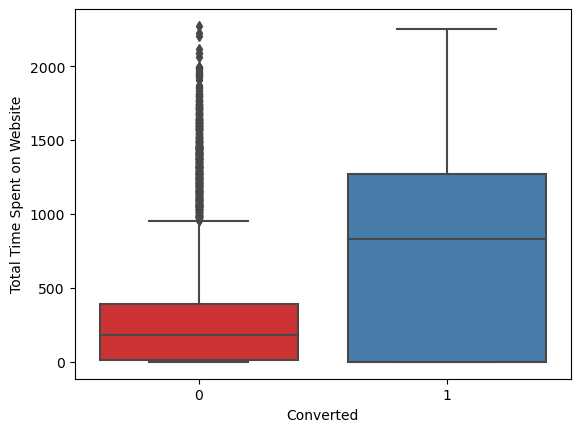

In [30]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df,palette='Set1')

**Inference:**
-  Leads spending more time on the weblise are more likely to be converted.

**Website should be made more engaging to make leads spend more time.**

**h.) Page Views Per Visit**

In [31]:
leads_df['Page Views Per Visit'].describe()

count    9240.000000
mean        2.255105
std         1.779471
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

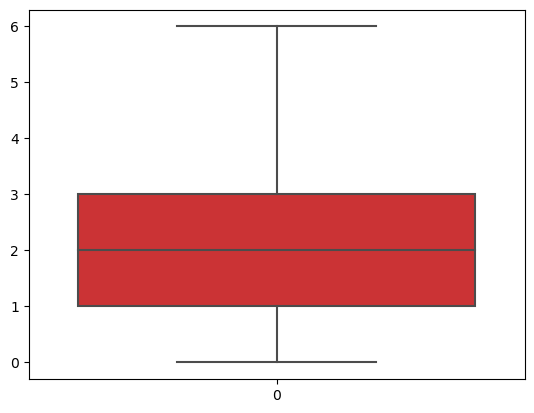

In [32]:
sns.boxplot(leads_df['Page Views Per Visit'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

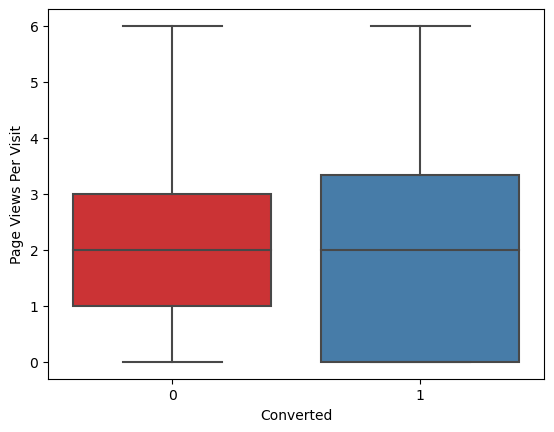

In [33]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =leads_df,palette='Set1')

**Inference:**
-  Median for converted and unconverted leads is the same.

**Nothing can be said specifically for lead conversion from Page Views Per Visit**

**i.)Last Activity**


In [34]:
leads_df['Last Activity'].describe()

count             9240
unique              17
top       email opened
freq              3540
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'page visited on website'),
  Text(1, 0, 'email opened'),
  Text(2, 0, 'unreachable'),
  Text(3, 0, 'converted to lead'),
  Text(4, 0, 'olark chat conversation'),
  Text(5, 0, 'email bounced'),
  Text(6, 0, 'email link clicked'),
  Text(7, 0, 'form submitted on website'),
  Text(8, 0, 'unsubscribed'),
  Text(9, 0, 'had a phone conversation'),
  Text(10, 0, 'view in browser link clicked'),
  Text(11, 0, 'approached upfront'),
  Text(12, 0, 'sms sent'),
  Text(13, 0, 'visited booth in tradeshow'),
  Text(14, 0, 'resubscribed to emails'),
  Text(15, 0, 'email received'),
  Text(16, 0, 'email marked spam')])

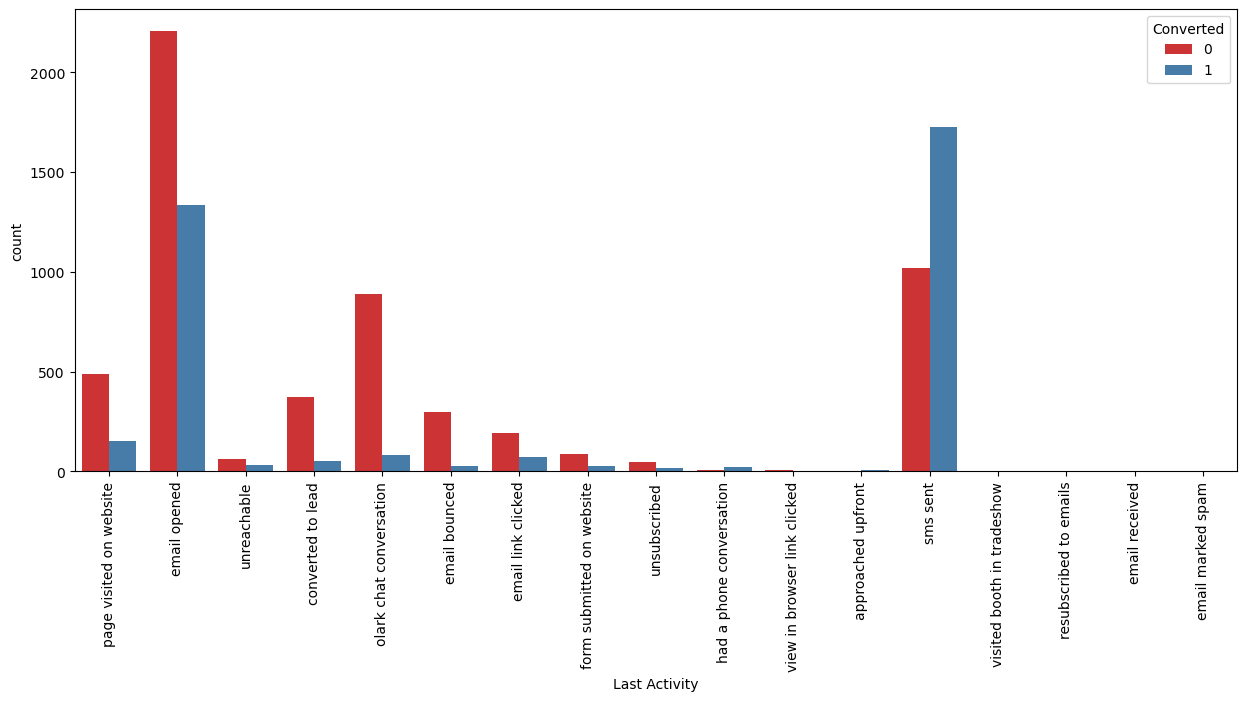

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
-  Most of the lead have their Email opened as their last activity.

**Conversion rate for leads with last activity as SMS Sent is almost 60%.**

**j.) Country**

(array([0, 1]), [Text(0, 0, 'india'), Text(1, 0, 'outside india')])

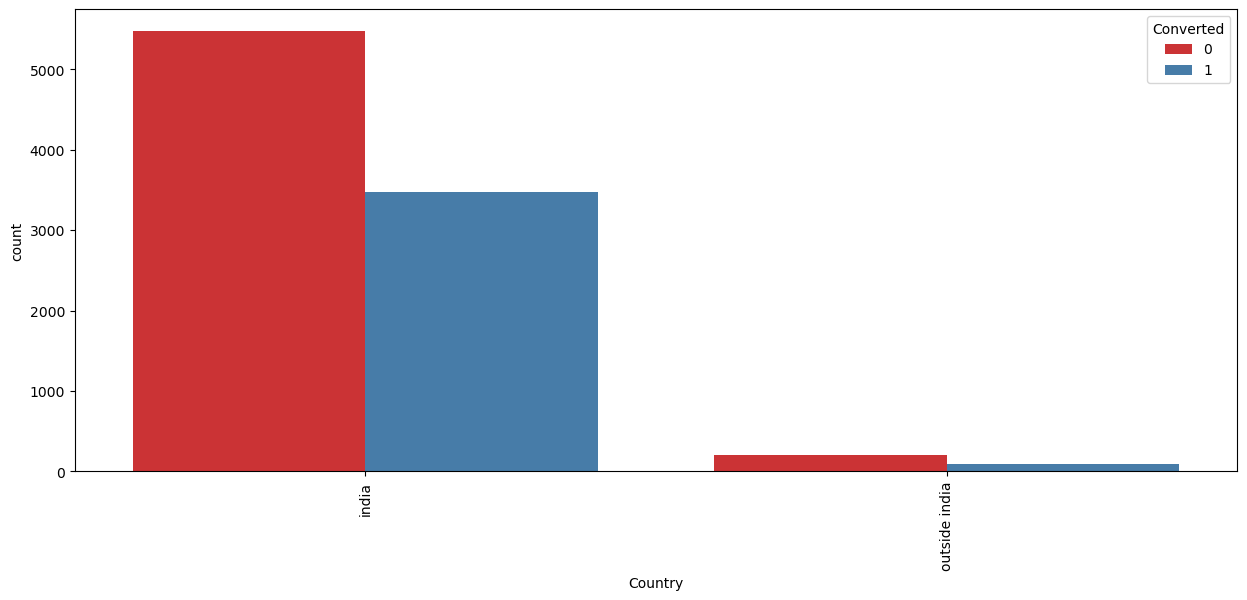

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:** Most values are 'India' no such inference can be drawn

**k.) Specialization**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'finance management'),
  Text(1, 0, 'business administration'),
  Text(2, 0, 'media and advertising'),
  Text(3, 0, 'supply chain management'),
  Text(4, 0, 'it projects management'),
  Text(5, 0, 'travel and tourism'),
  Text(6, 0, 'human resource management'),
  Text(7, 0, 'marketing management'),
  Text(8, 0, 'banking, investment and insurance'),
  Text(9, 0, 'international business'),
  Text(10, 0, 'e-commerce'),
  Text(11, 0, 'operations management'),
  Text(12, 0, 'retail management'),
  Text(13, 0, 'services excellence'),
  Text(14, 0, 'hospitality management'),
  Text(15, 0, 'rural and agribusiness'),
  Text(16, 0, 'healthcare management'),
  Text(17, 0, 'e-business')])

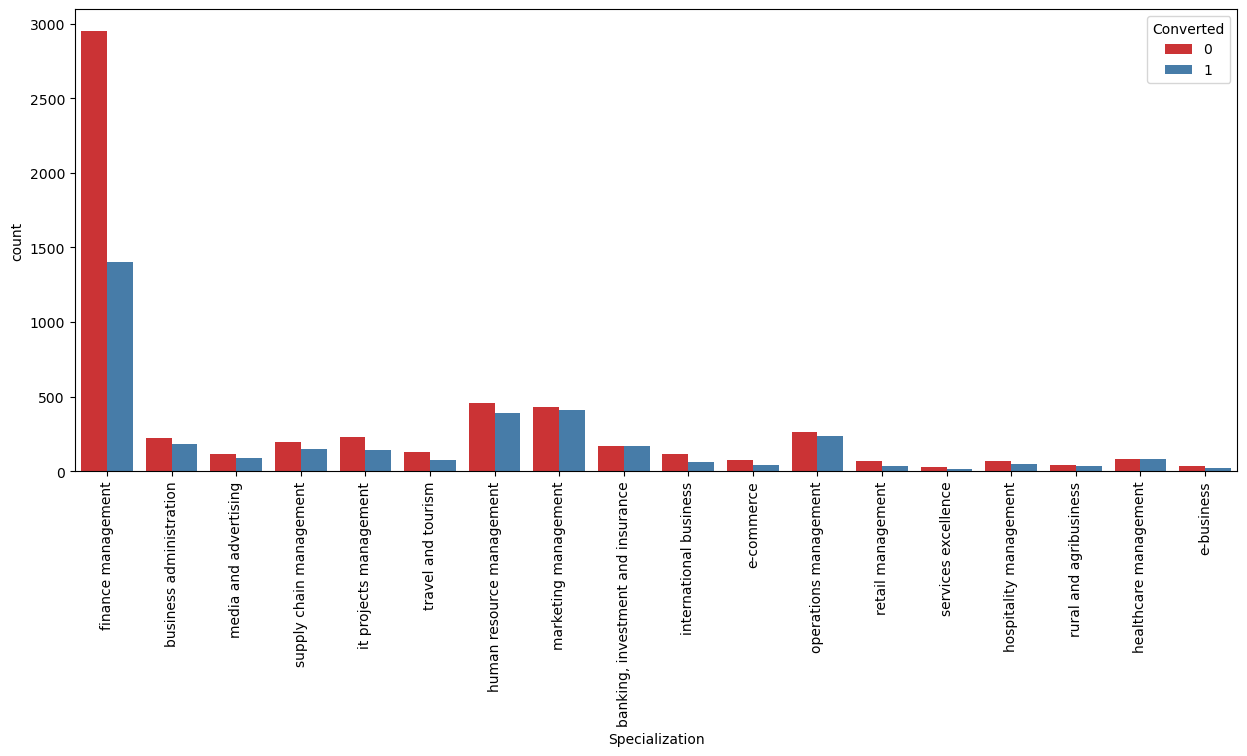

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
Focus should be more on the Specialization with high conversion rate.

**l.) What is your current occupation**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'unemployed'),
  Text(1, 0, 'student'),
  Text(2, 0, 'working professional'),
  Text(3, 0, 'businessman'),
  Text(4, 0, 'other'),
  Text(5, 0, 'housewife')])

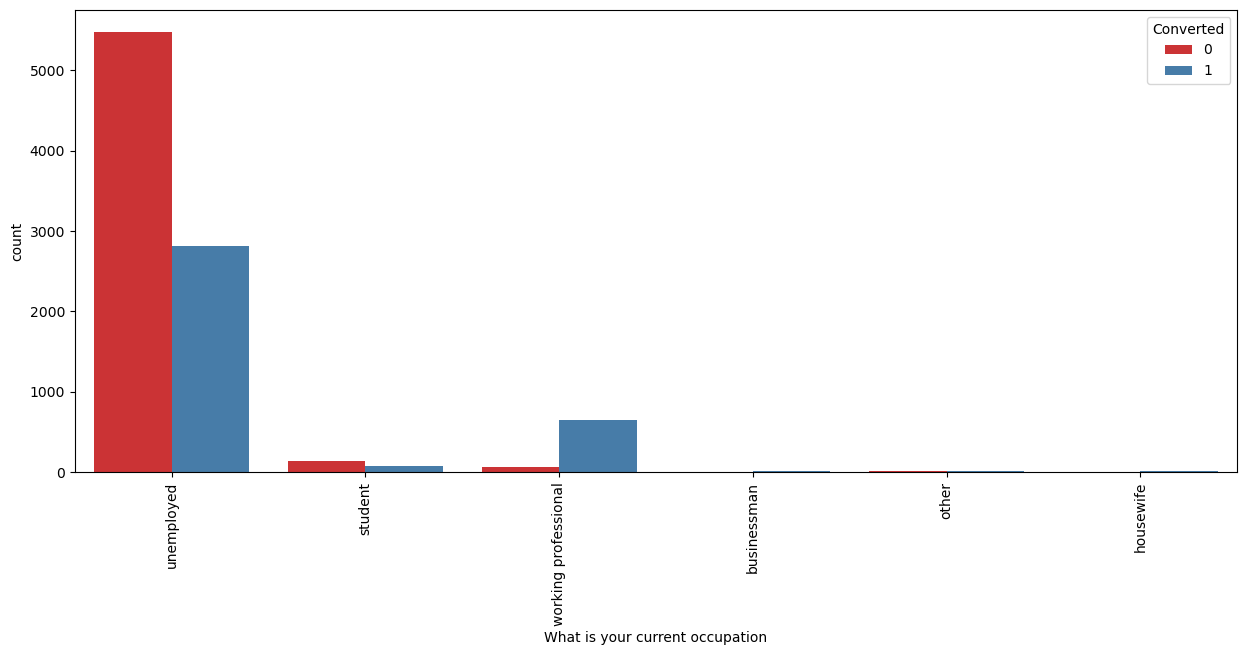

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
-  Working Professionals going for the course have high chances of joining it.

**Unemployed leads are the most in numbers but has around 30-35% conversion rate.**

**m.) Search**

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

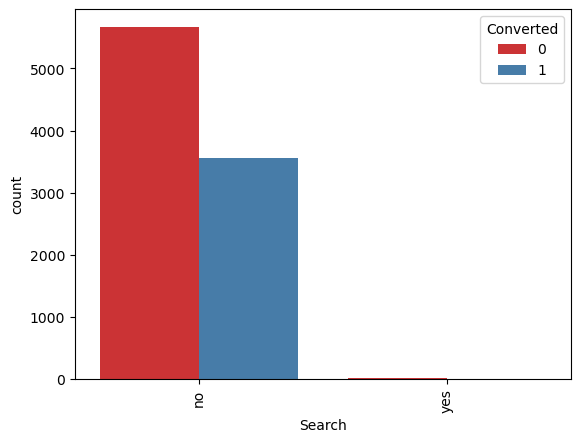

In [39]:
sns.countplot(x = "Search", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
Most entries are 'No'. No Inference can be drawn with this parameter.

**n.)Magazine**

(array([0]), [Text(0, 0, 'no')])

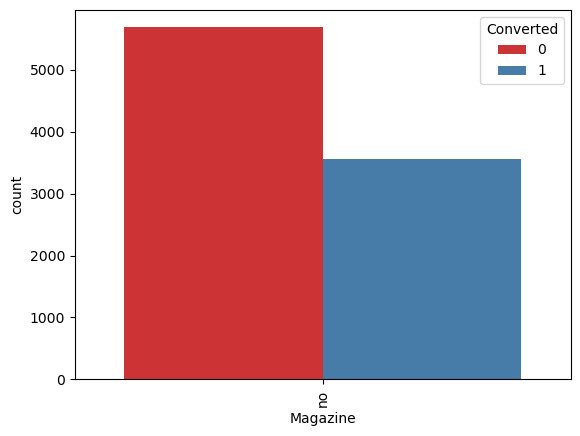

In [40]:
sns.countplot(x = "Magazine", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
Most entries are 'No'. No Inference can be drawn with this parameter.

**o.) Newspaper Article**


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

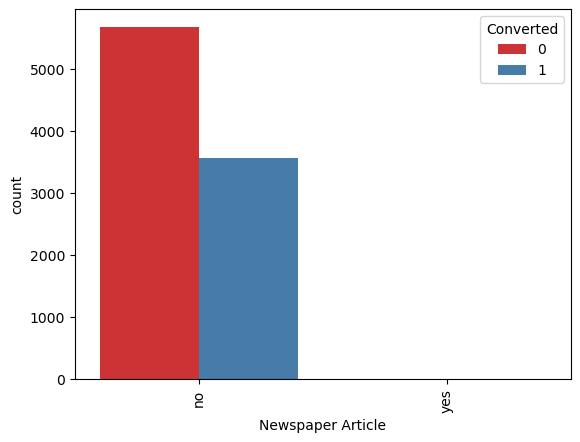

In [41]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
Most entries are 'No'. No Inference can be drawn with this parameter.

**p.) X Education Forums**


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

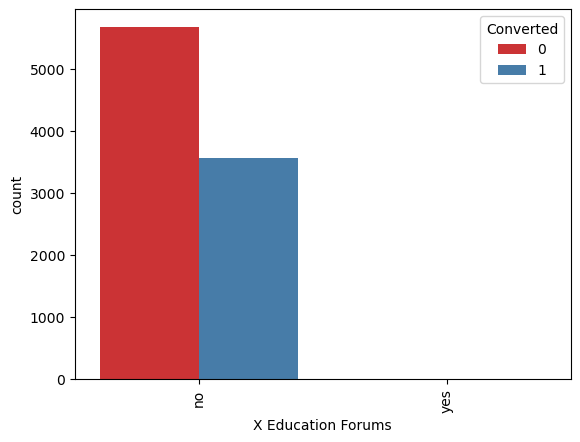

In [42]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
Most entries are 'No'. No Inference can be drawn with this parameter.

**q.) Newspaper**

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

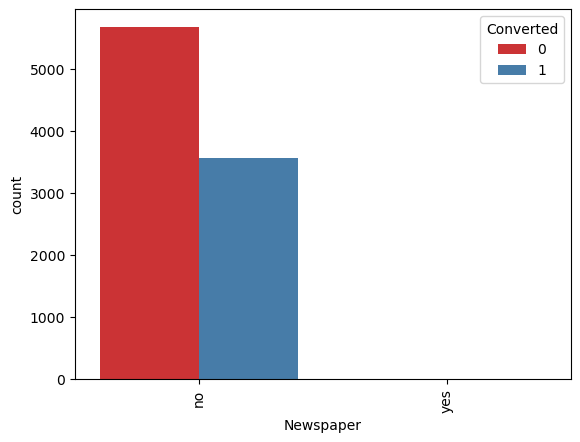

In [43]:
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
Most entries are 'No'. No Inference can be drawn with this parameter.

**r.) Digital Advertisement**


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

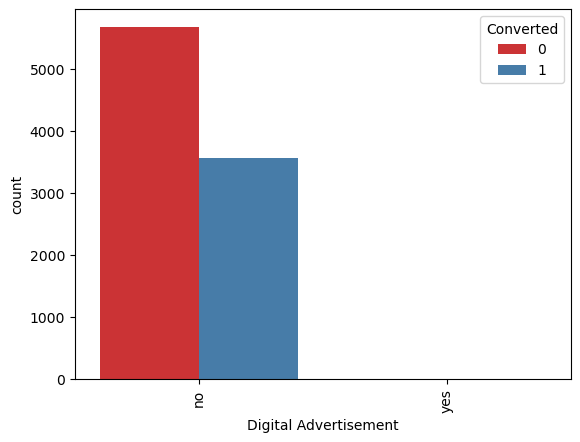

In [44]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
Most entries are 'No'. No Inference can be drawn with this parameter.

**s.)Through Recommendations**

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

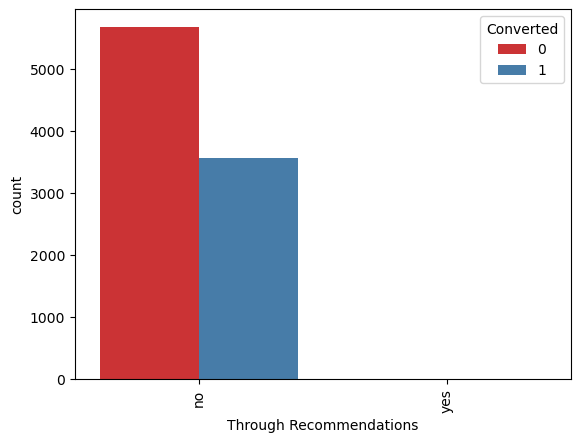

In [45]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
Most entries are 'No'. No Inference can be drawn with this parameter.

**t.) Receive More Updates About Our Courses**

(array([0]), [Text(0, 0, 'no')])

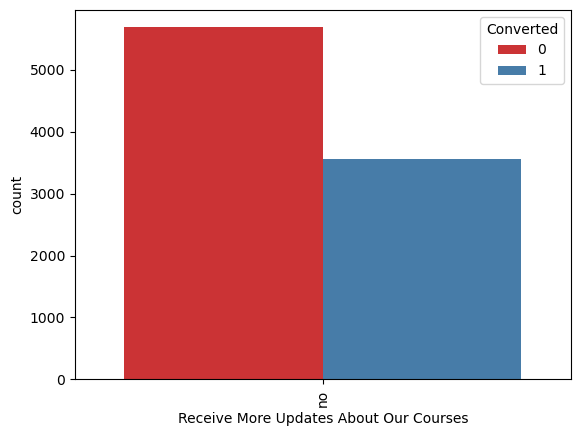

In [46]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
Most entries are 'No'. No Inference can be drawn with this parameter.

**u.) Tags**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'interested in other courses'),
  Text(1, 0, 'ringing'),
  Text(2, 0, 'will revert after reading the email'),
  Text(3, 0, 'lost to eins'),
  Text(4, 0, 'in confusion whether part time or dlp'),
  Text(5, 0, 'busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with eins'),
  Text(8, 0, 'already a student'),
  Text(9, 0, 'diploma holder (not eligible)'),
  Text(10, 0, 'graduation in progress'),
  Text(11, 0, 'closed by horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'interested  in full time mba'),
  Text(18, 0, 'still thinking'),
  Text(19, 0, 'lost to others'),
  Text(20, 0, 'shall take in the next coming month'),
  Text(21, 0, 'lateral student'),
  Text(22, 0, 'interested in next batc

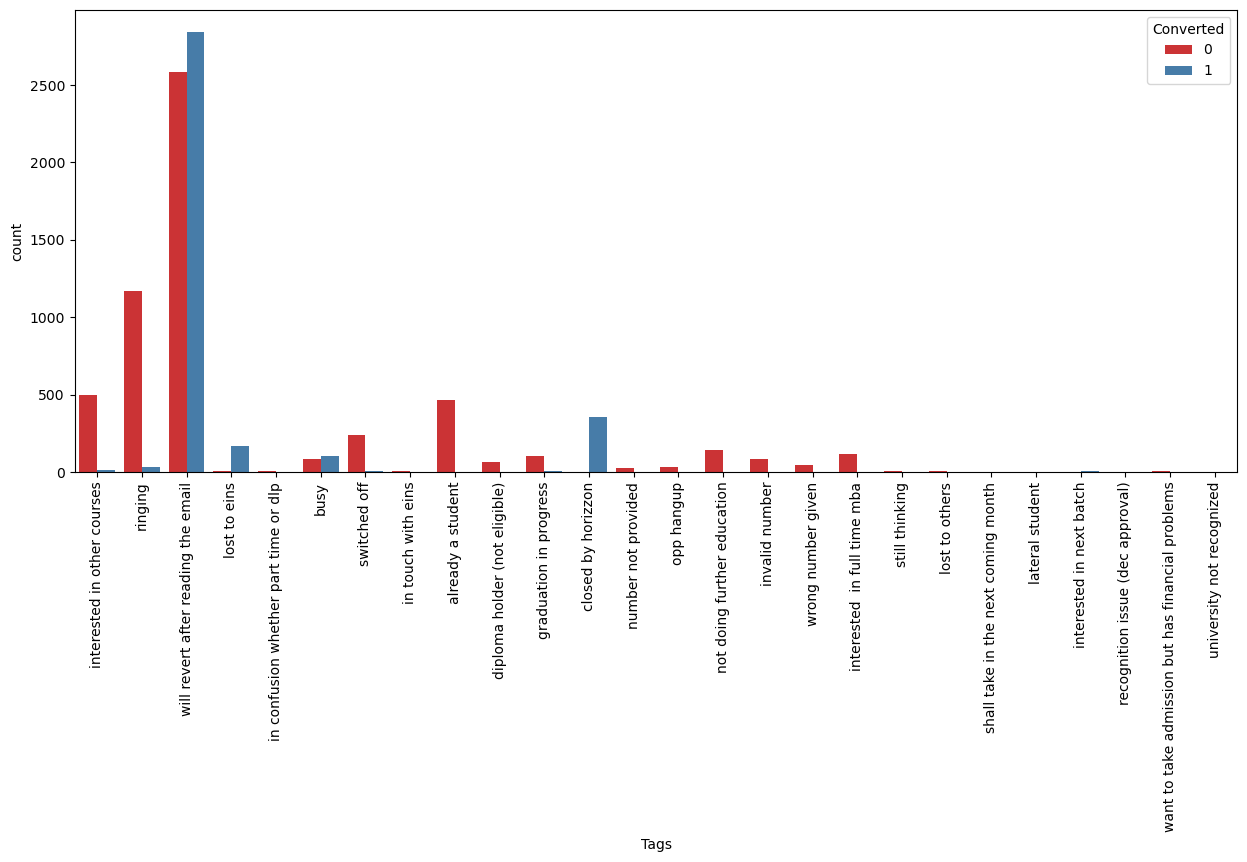

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
-  Since this is a column which is generated by the sales team for their analysis , so this is not available for model 

**building . So we will need to remove this column before building the model.**

**v.)City**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'mumbai'),
  Text(1, 0, 'thane & outskirts'),
  Text(2, 0, 'other metro cities'),
  Text(3, 0, 'other cities'),
  Text(4, 0, 'other cities of maharashtra'),
  Text(5, 0, 'tier ii cities')])

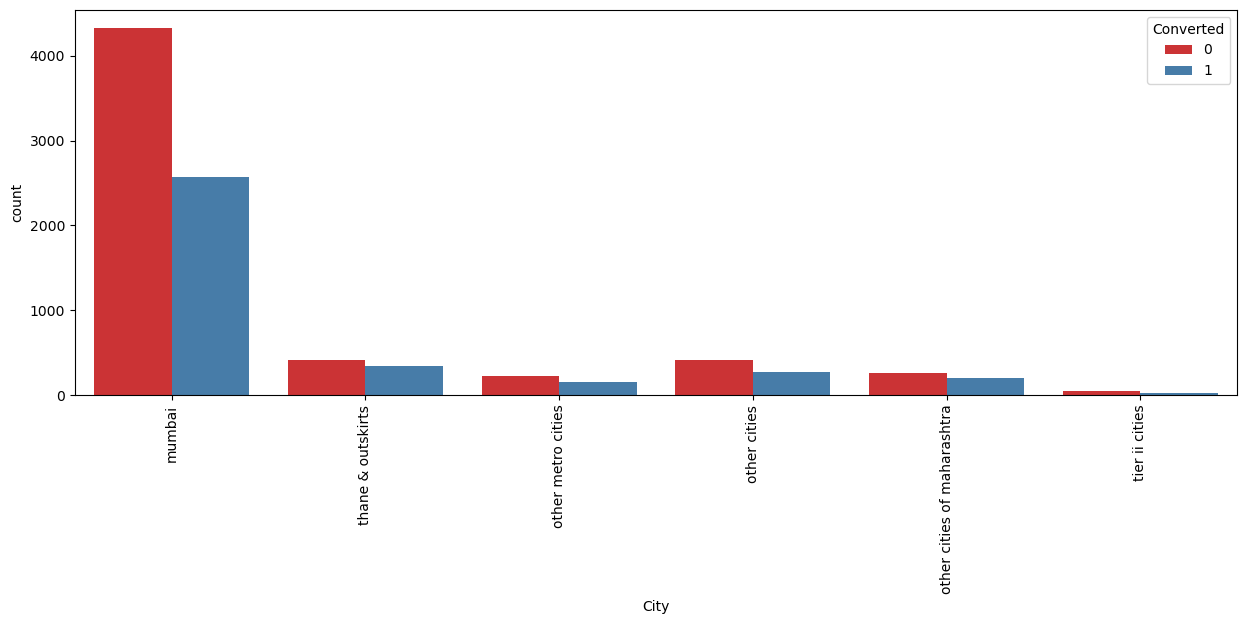

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

**Inference:**
Most leads are from mumbai with around 50% conversion rate.

**w.)Last Notable Activity**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'modified'),
  Text(1, 0, 'email opened'),
  Text(2, 0, 'page visited on website'),
  Text(3, 0, 'email bounced'),
  Text(4, 0, 'email link clicked'),
  Text(5, 0, 'unreachable'),
  Text(6, 0, 'unsubscribed'),
  Text(7, 0, 'had a phone conversation'),
  Text(8, 0, 'olark chat conversation'),
  Text(9, 0, 'sms sent'),
  Text(10, 0, 'approached upfront'),
  Text(11, 0, 'resubscribed to emails'),
  Text(12, 0, 'view in browser link clicked'),
  Text(13, 0, 'form submitted on website'),
  Text(14, 0, 'email received'),
  Text(15, 0, 'email marked spam')])

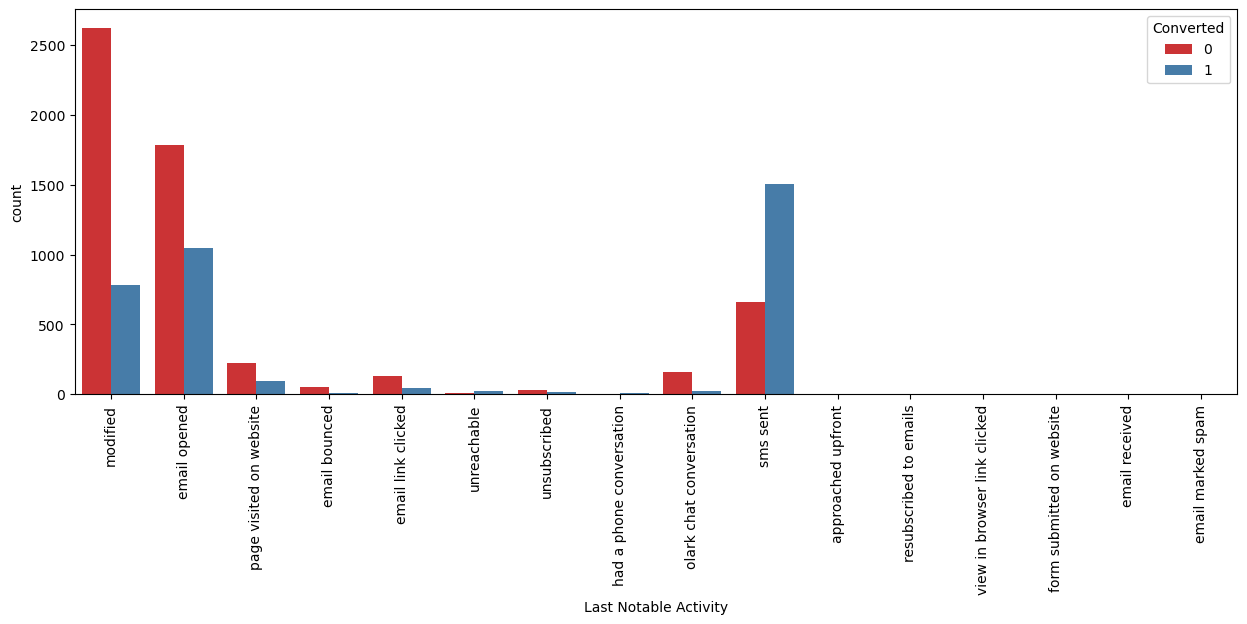

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df,palette='Set1')
plt.xticks(rotation = 90)

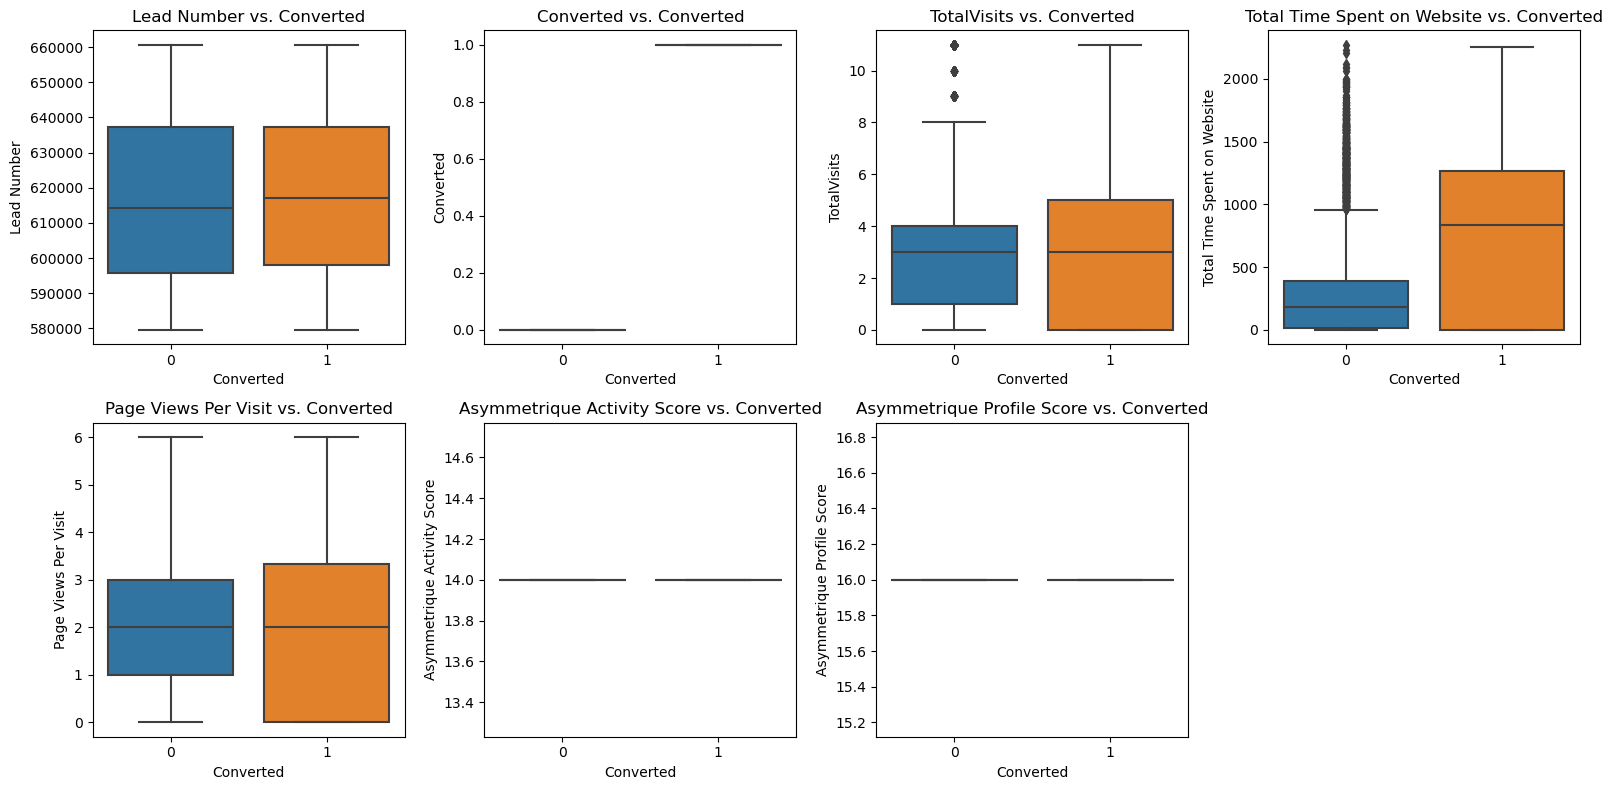

In [50]:
# Bivariate analysis for numerical vs. target variable
num_numerical_cols = len(numerical_cols)
n_rows = (num_numerical_cols // 4) + int(num_numerical_cols % 4 != 0)  # Calculate rows needed

plt.figure(figsize=(16, 4 * n_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, 4, i + 1)
    sns.boxplot(x='Converted', y=col, data=leads_df)
    plt.title(f'{col} vs. Converted')
plt.tight_layout()
plt.show()


**Inference:** 
-  **Constant Variables (Asymmetrique Activity Score and Asymmetrique Profile Score):**

No Discriminatory Power: Since these scores are constants, they do not vary between different leads. Therefore, they do not have any discriminatory power to predict or explain conversion. They can be considered for removal from the dataset as they do not add value to the predictive model or analysis.

-  **Total Visits vs. Converted:**

The box plot shows that leads that have converted tend to have higher Total Visits. This suggests that leads with more interactions (higher total visits) are more likely to convert.

-  **Total Time Spent on Website vs. Converted:**

Converted leads tend to spend more time on the website. This indicates that engagement time is a positive indicator of conversion likelihood.

-  **Page Views Per Visit vs. Converted:**

There seems to be a slightly higher number of page views per visit for converted leads. This can suggest that more engaged users who explore more pages per visit are more likely to convert.

### 4.2 MULTIVARIATE ANALYSIS

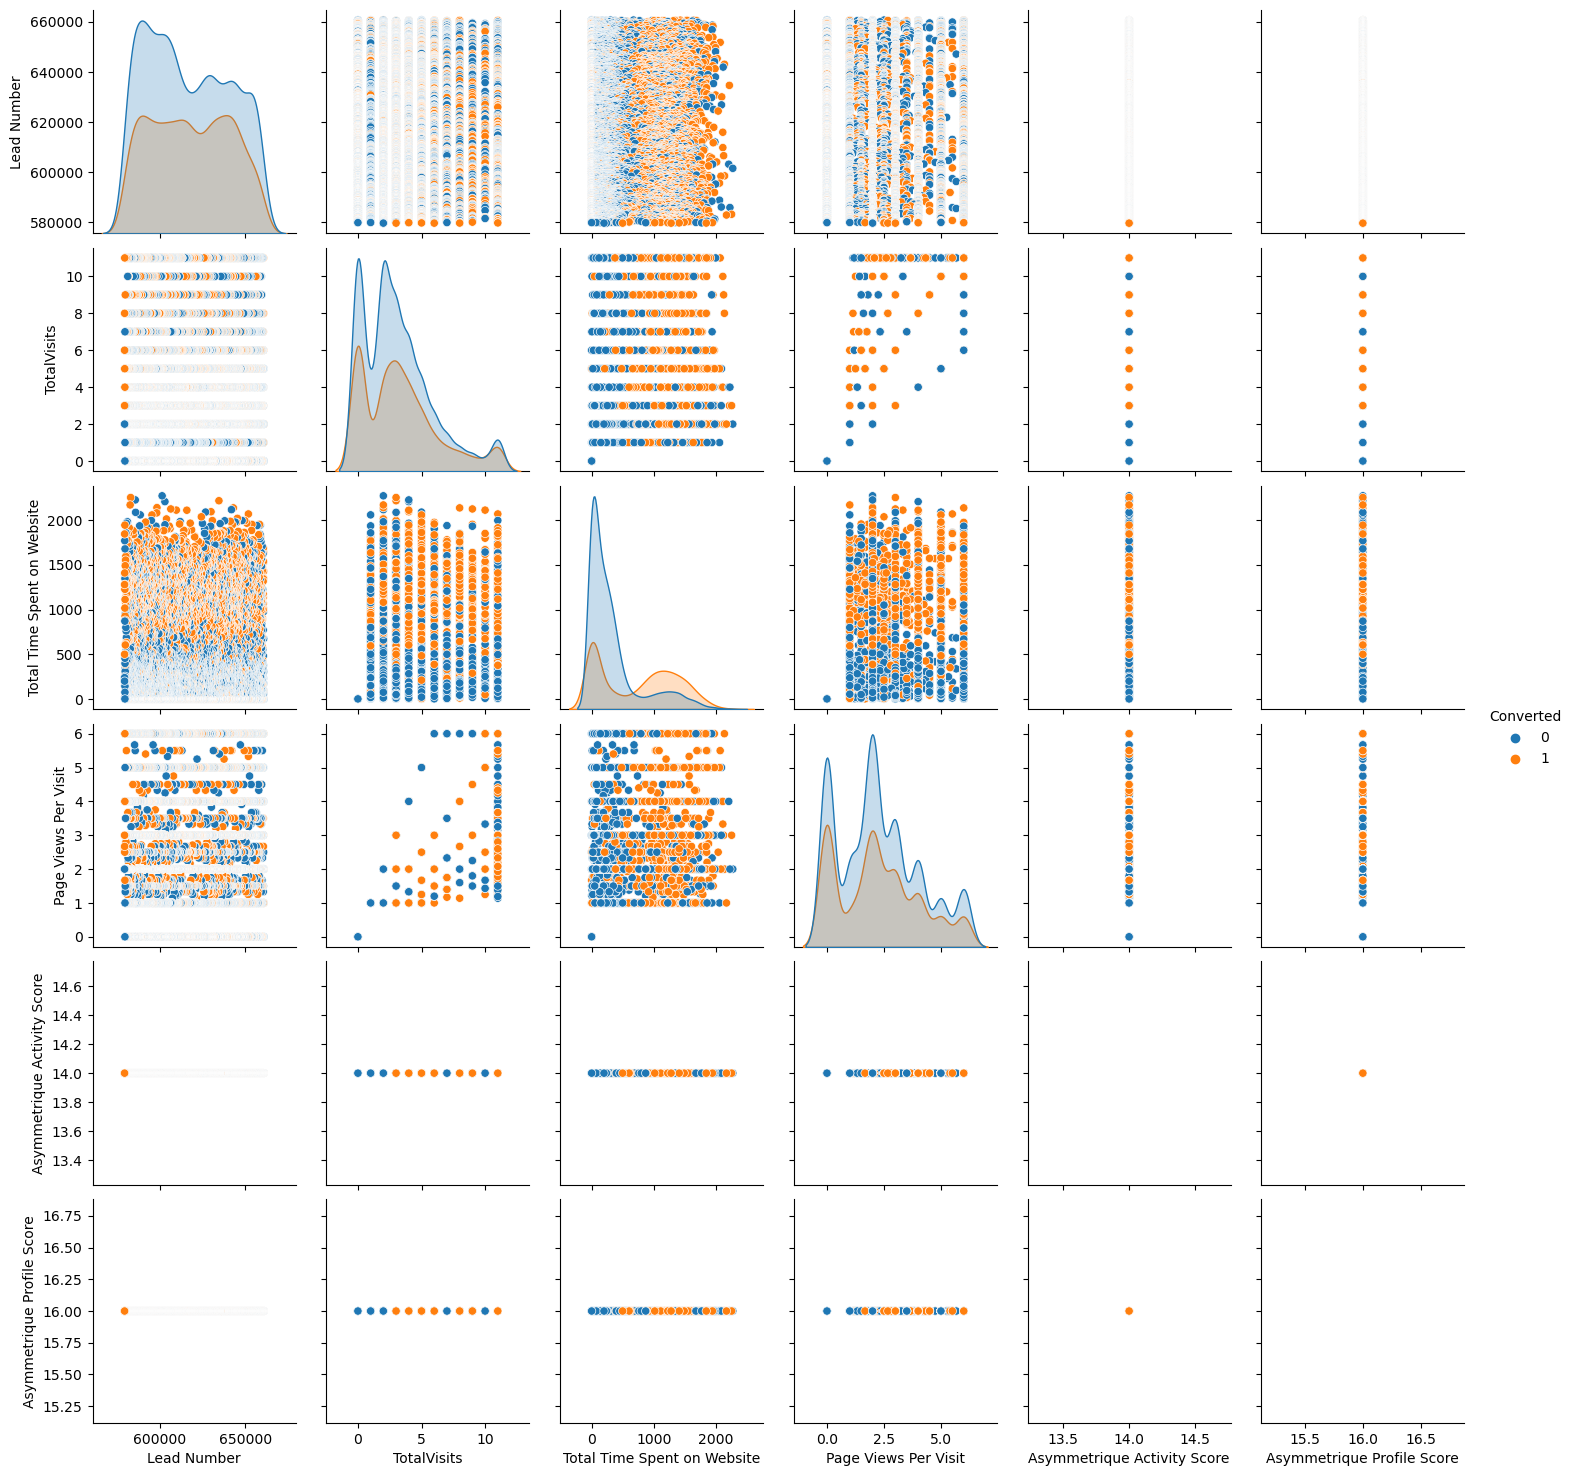

In [51]:
# Pair plots for numerical variables
sns.pairplot(leads_df[numerical_cols], diag_kind='kde', hue='Converted')
plt.show()

**Inference:**
-  **Total Visits:**

Converted vs. Non-Converted: The scatter plots and density plots indicate that both converted and non-converted leads have a wide range of total visits. However, there seems to be a slight concentration of converted leads with higher total visits, suggesting that leads who visit the website more frequently have a higher chance of conversion.

-  **Total Time Spent on Website:**

Engagement Indicator: Converted leads tend to spend more time on the website. The density plot shows a higher concentration of converted leads in the upper range of total time spent, indicating that time spent on the website is a strong indicator of conversion likelihood.

-  **Page Views Per Visit:**

Exploration Behavior: Converted leads generally have a higher number of page views per visit compared to non-converted leads. This suggests that leads who explore more pages during their visits are more engaged and have a higher probability of converting.

-  **Asymmetrique Activity Score and Asymmetrique Profile Score:**

Constant Values: Since these scores are constants (14 for Activity Score and 16 for Profile Score), they do not provide any meaningful variance or insight when comparing converted and non-converted leads. Therefore, they do not contribute to distinguishing between the two groups.

## 5. Hypothesis Testing

In [52]:
# Hypothesis 1: Total Time Spent on Website
converted = leads_df[leads_df['Converted'] == 1]['Total Time Spent on Website']
not_converted = leads_df[leads_df['Converted'] == 0]['Total Time Spent on Website']
t_stat, p_val = stats.ttest_ind(converted, not_converted)
print(f"Hypothesis 1: p-value = {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the total time spent on the website between leads that converted and those that did not.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the total time spent on the website between leads that converted and those that did not.")

Hypothesis 1: p-value = 6.061532215246037e-285
Reject the null hypothesis: There is a significant difference in the total time spent on the website between leads that converted and those that did not.


In [53]:
# Hypothesis 2: Lead Source and Conversion
contingency_table = pd.crosstab(leads_df['Lead Source'], leads_df['Converted'])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
print(f"\nHypothesis 2: p-value = {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant association between the lead source and whether the lead converted or not.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the lead source and whether the lead converted or not.")


Hypothesis 2: p-value = 2.2610765566902964e-212
Reject the null hypothesis: There is a significant association between the lead source and whether the lead converted or not.


In [54]:
# Hypothesis 3: Total Visits
converted = leads_df[leads_df['Converted'] == 1]['TotalVisits']
not_converted = leads_df[leads_df['Converted'] == 0]['TotalVisits']
t_stat, p_val = stats.ttest_ind(converted, not_converted)
print(f"\nHypothesis 3: p-value = {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the number of total visits between leads that converted and those that did not.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of total visits between leads that converted and those that did not.")


Hypothesis 3: p-value = 8.731613124367009e-06
Reject the null hypothesis: There is a significant difference in the number of total visits between leads that converted and those that did not.


In [55]:
# Hypothesis 4: Page Views Per Visit
converted = leads_df[leads_df['Converted'] == 1]['Page Views Per Visit']
not_converted = leads_df[leads_df['Converted'] == 0]['Page Views Per Visit']
t_stat, p_val = stats.ttest_ind(converted, not_converted)
print(f"\nHypothesis 4: p-value = {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the page views per visit between leads that converted and those that did not.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the page views per visit between leads that converted and those that did not.")


Hypothesis 4: p-value = 0.6112393152811724
Fail to reject the null hypothesis: There is no significant difference in the page views per visit between leads that converted and those that did not.


In [56]:
# Hypothesis 5: City and Conversion
contingency_table = pd.crosstab(leads_df['City'], leads_df['Converted'])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
print(f"\nHypothesis 5: p-value = {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant association between the city of the lead and whether the lead converted or not.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the city of the lead and whether the lead converted or not.")



Hypothesis 5: p-value = 8.784900567282934e-05
Reject the null hypothesis: There is a significant association between the city of the lead and whether the lead converted or not.


In [57]:
# Hypothesis 6: Asymmetrique Activity Score
converted = leads_df[leads_df['Converted'] == 1]['Asymmetrique Activity Score']
not_converted = leads_df[leads_df['Converted'] == 0]['Asymmetrique Activity Score']
t_stat, p_val = stats.ttest_ind(converted, not_converted)
print(f"\nHypothesis 6: p-value = {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the Asymmetrique Activity Score between leads that converted and those that did not.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the Asymmetrique Activity Score between leads that converted and those that did not.")


Hypothesis 6: p-value = nan
Fail to reject the null hypothesis: There is no significant difference in the Asymmetrique Activity Score between leads that converted and those that did not.


**Results : Based on the EDA we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis**

In [58]:
leads_df = leads_df.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement',
                          'Through Recommendations','Receive More Updates About Our Courses',
                          'Update me on Supply Chain Content','Get updates on DM Content',
                          'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Asymmetrique Activity Score','Asymmetrique Profile Score','Prospect ID'],
                          axis=1)

In [59]:
leads_df.shape

(9240, 17)

In [60]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Specialization                                 9240 

## 6. Creating Dummy Variables

In [61]:
#Converting some binary variables (Yes/No) to 1/0
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

leads_df[vars] = leads_df[vars].apply(binary_map)

In [62]:
#Creating Dummy Variables
leads_df = pd.get_dummies(leads_df, drop_first=True)

In [63]:
# Convert boolean columns to integers (0 and 1)
bool_cols = leads_df.select_dtypes(include=['bool']).columns
leads_df[bool_cols] = leads_df[bool_cols].astype(int)

# Check the data types of your columns
print(leads_df.dtypes)

Do Not Email                                            int64
Do Not Call                                             int64
Converted                                               int64
TotalVisits                                           float64
Total Time Spent on Website                             int64
                                                       ...   
Last Notable Activity_resubscribed to emails            int32
Last Notable Activity_sms sent                          int32
Last Notable Activity_unreachable                       int32
Last Notable Activity_unsubscribed                      int32
Last Notable Activity_view in browser link clicked      int32
Length: 97, dtype: object


## 7. Splitting Data into Train and Test Sets

In [64]:
X = leads_df.drop('Converted', axis=1)
y = leads_df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 8. Scaling the Features

In [65]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
4715,0,0,-1.128195,-0.887525,-1.274434,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7132,0,0,-0.433491,1.386983,-0.710273,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8954,0,0,0.261212,-0.182209,-0.524099,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5283,1,0,2.692673,1.315905,2.110536,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3003,0,0,-0.086140,1.580170,0.418051,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [66]:
# Checking the Lead Conversion rate
Converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

38.53896103896104

**We have almost 38.5% lead conversion rate.**

## 9. Feature Selection Using RFE

In [67]:
logreg = LogisticRegression()

rfe = RFE(estimator=logreg, n_features_to_select=20)         # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)


In [68]:
rfe.support_

array([ True, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False])

In [69]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('Lead Origin_landing page submission', False, 18),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 65),
 ('Lead Origin_quick add form', False, 11),
 ('Lead Source_blog', False, 34),
 ('Lead Source_click2call', False, 57),
 ('Lead Source_direct traffic', False, 28),
 ('Lead Source_facebook', False, 17),
 ('Lead Source_google', False, 36),
 ('Lead Source_live chat', False, 42),
 ('Lead Source_nc_edm', False, 8),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 35),
 ('Lead Source_pay per click ads', False, 48),
 ('Lead Source_press_release', False, 72),
 ('Lead Source_reference', False, 20),
 ('Lead Source_referral sites', False, 24),
 ('Lead Source_social media', False, 4),
 ('Lead Source_testone', False, 75),
 ('Lead Source_welearn', False, 55),
 ('Lead Source_wele

In [70]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Last Activity_converted to lead',
       'Last Activity_olark chat conversation',
       'Specialization_hospitality management',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Lead Quality_might be', 'Lead Quality_not sure', 'Lead Quality_worst',
       'Asymmetrique Activity Index_03.low',
       'Last Notable Activity_email link clicked',
       'Last Notable Activity_email opened',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website'],
      dtype='object')

## 10. Model Building

### Model-1

-  **Initial Model Training**

In [71]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2334.2
Date:                Wed, 31 Jul 2024   Deviance:                       4668.4
Time:                        19:24:12   Pearson chi2:                 7.57e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4568
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.8179      0.321     11.901      0.000       3.189       4.447
Do Not Email                                            -1.5361      0.173     -8.870      0.000      -1.876      -1.197
Total Time Spent on Website                              1.0515      0.043     24.709      0.000       0.968       1.135
Lead Origin_lead add form                                2.5850      0.214     12.056      0.000       2.165       3.005
Lead Source_olark chat                                   1.0095      0.109      9.229      0.000       0.795       1.224
Lead Source_welingak website                            23.6180   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
Last Activity_converted to lead                         -1.1251      0.237     -4.743      0.000      -1.590      -0.660
Last Activity_olark chat conversation                   -1.1811      0.196     -6.012      0.000      -1.566      -0.796
Specialization_hospitality management                   -1.0748      0.375     -2.866      0.004      -1.810      -0.340
What is your current occupation_unemployed              -0.8035      0.296     -2.719      0.007      -1.383      -0.224
What is your current occupation_working professional     1.5909      0.352      4.516      0.000       0.900       2.281
Lead Quality_might be                                   -2.6624      0.134    -19.905      0.000      -2.925      -2.400
Lead Quality_not sure                                   -3.3902      0.167    -20.243      0.000      -3.718      -3.062
Lead Quality_worst                                      -5.3036      0.383    -13.831      0.000      -6.055      -4.552
Asymmetrique Activity Index_03.low                      -1.7777      0.292     -6.088      0.000      -2.350      -1.205
Last Notable Activity_email link clicked                -1.9638      0.278     -7.052      0.000      -2.510      -1.418
Last Notable Activity_email opened                      -1.8022      0.097    -18.522      0.000      -1.993      -1.612
Last Notable Activity_had a phone conversation           1.2184      1.118      1.090      0.276      -0.973       3.410
Last Notable Activity_modified                          -1.8778      0.107    -17.469      0.000      -2.088      -1.667
Last Notable Activity_olark chat conversation           -1.9854      0.396     -5.012      0.000      -2.762      -1.209
Last Notable Activity_page visited on website           -1.7219      0.210     -8.197      0.000      -2.134      -1.310
========================================================================================================================
"""


**Since Pvalue of 'Lead Source_welingak website' is very high, we can drop this column.**

-  **Model Evaluation**

In [72]:
# Predictions using the model
y_train_pred_prob = result.predict(X_train_sm)
y_train_pred = np.where(y_train_pred_prob >= 0.5, 1, 0)

In [73]:
# Accuracy
accuracy1 = accuracy_score(y_train, y_train_pred)
print(f'Accuracy: {accuracy1}')

Accuracy: 0.8470933828076685


In [74]:
# Precision
precision1 = precision_score(y_train, y_train_pred)
print(f'Precision: {precision1}')

Precision: 0.8259921500218055


In [75]:
# Recall
recall1 = recall_score(y_train, y_train_pred)
print(f'Recall: {recall1}')

Recall: 0.7624798711755234


In [76]:
# F1 Score
f11 = f1_score(y_train, y_train_pred)
print(f'F1 Score: {f11}')

F1 Score: 0.7929662968390203


In [77]:
# ROC AUC
roc_auc1 = roc_auc_score(y_train, y_train_pred_prob)
print(f'ROC AUC: {roc_auc1}')

ROC AUC: 0.9115848458245219


In [78]:
# Confusion Matrix
conf_matrix1 = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:\n', conf_matrix1)

Confusion Matrix:
 [[3585  399]
 [ 590 1894]]


In [79]:
# Classification Report
class_report = classification_report(y_train, y_train_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      3984
           1       0.83      0.76      0.79      2484

    accuracy                           0.85      6468
   macro avg       0.84      0.83      0.84      6468
weighted avg       0.85      0.85      0.85      6468



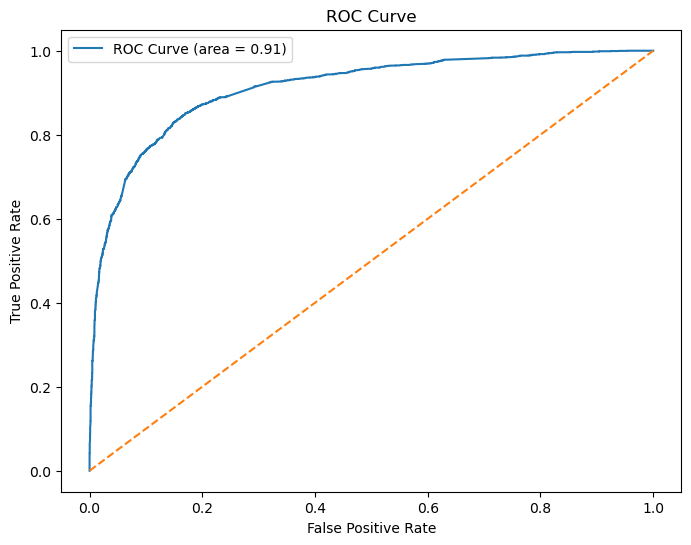

In [80]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

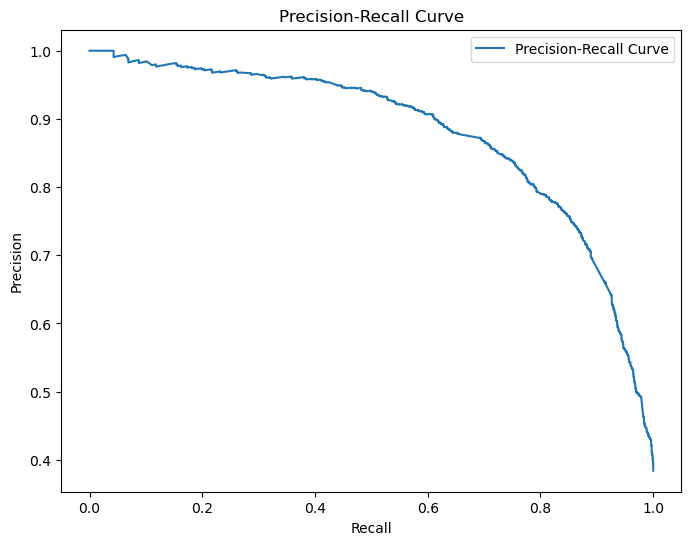

In [81]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_train, y_train_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

-  **Residual Analysis**

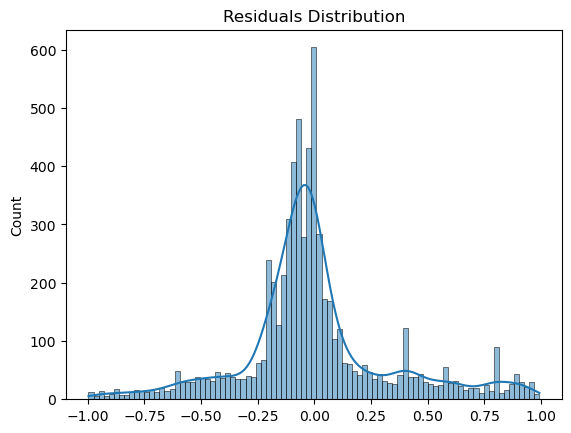

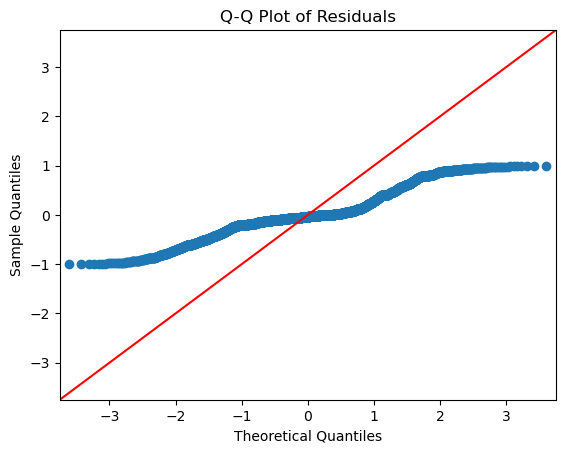

In [82]:
# Calculate residuals
residuals = y_train - y_train_pred_prob

# Plot residuals distribution
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Q-Q Plot to check normality
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

## Model-2

In [83]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('Lead Source_welingak website')

-  **Initial Model Training**

In [84]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2354.8
Date:                Wed, 31 Jul 2024   Deviance:                       4709.7
Time:                        19:24:15   Pearson chi2:                 8.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4533
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.7450      0.322     11.635      0.000       3.114       4.376
Do Not Email                                            -1.5458      0.172     -8.966      0.000      -1.884      -1.208
Total Time Spent on Website                              1.0472      0.042     24.669      0.000       0.964       1.130
Lead Origin_lead add form                                3.2416      0.206     15.751      0.000       2.838       3.645
Lead Source_olark chat                                   0.9993      0.109      9.162      0.000       0.786       1.213
Last Activity_converted to lead                         -1.1166      0.236     -4.730      0.000      -1.579      -0.654
Last Activity_olark chat conversation                   -1.1791      0.196     -6.022      0.000      -1.563      -0.795
Specialization_hospitality management                   -1.1029      0.380     -2.905      0.004      -1.847      -0.359
What is your current occupation_unemployed              -0.7811      0.297     -2.628      0.009      -1.364      -0.198
What is your current occupation_working professional     1.5601      0.355      4.399      0.000       0.865       2.255
Lead Quality_might be                                   -2.6115      0.134    -19.511      0.000      -2.874      -2.349
Lead Quality_not sure                                   -3.3459      0.167    -19.990      0.000      -3.674      -3.018
Lead Quality_worst                                      -5.2624      0.383    -13.734      0.000      -6.013      -4.511
Asymmetrique Activity Index_03.low                      -1.7785      0.293     -6.078      0.000      -2.352      -1.205
Last Notable Activity_email link clicked                -1.9333      0.275     -7.020      0.000      -2.473      -1.393
Last Notable Activity_email opened                      -1.7854      0.097    -18.432      0.000      -1.975      -1.596
Last Notable Activity_had a phone conversation           1.2242      1.117      1.096      0.273      -0.964       3.413
Last Notable Activity_modified                          -1.8667      0.107    -17.431      0.000      -2.077      -1.657
Last Notable Activity_olark chat conversation           -1.9752      0.395     -4.997      0.000      -2.750      -1.200
Last Notable Activity_page visited on website           -1.7023      0.208     -8.165      0.000      -2.111      -1.294
========================================================================================================================
"""

**Since Pvalue of 'Last Notable Activity_had a phone conversation' is very high, we can drop this column.**

-  **Model Evaluation**

In [85]:
# Model Predictions
y_train_pred_prob = res.predict(X_train_sm)
y_train_pred = np.where(y_train_pred_prob >= 0.5, 1, 0)

In [86]:
# Accuracy
accuracy2 = accuracy_score(y_train, y_train_pred)
print(f'Accuracy: {accuracy2}')

Accuracy: 0.8466295609152752


In [87]:
# Precision
precision2 = precision_score(y_train, y_train_pred)
print(f'Precision: {precision2}')

Precision: 0.826048951048951


In [88]:
#recall
recall2 = recall_score(y_train, y_train_pred)
print(f'recall: {recall2}')

recall: 0.7608695652173914


In [89]:
# F1 Score
f12 = f1_score(y_train, y_train_pred)
print(f'F1 Score: {f12}')

F1 Score: 0.7921207041072925


In [90]:
# ROC AUC
roc_auc2 = roc_auc_score(y_train, y_train_pred_prob)
print(f'ROC AUC: {roc_auc2}')

ROC AUC: 0.9108720510059561


In [91]:
# Confusion Matrix
conf_matrix2 = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:\n', conf_matrix2)

Confusion Matrix:
 [[3586  398]
 [ 594 1890]]


In [92]:
# Classification Report
class_report = classification_report(y_train, y_train_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      3984
           1       0.83      0.76      0.79      2484

    accuracy                           0.85      6468
   macro avg       0.84      0.83      0.84      6468
weighted avg       0.85      0.85      0.85      6468



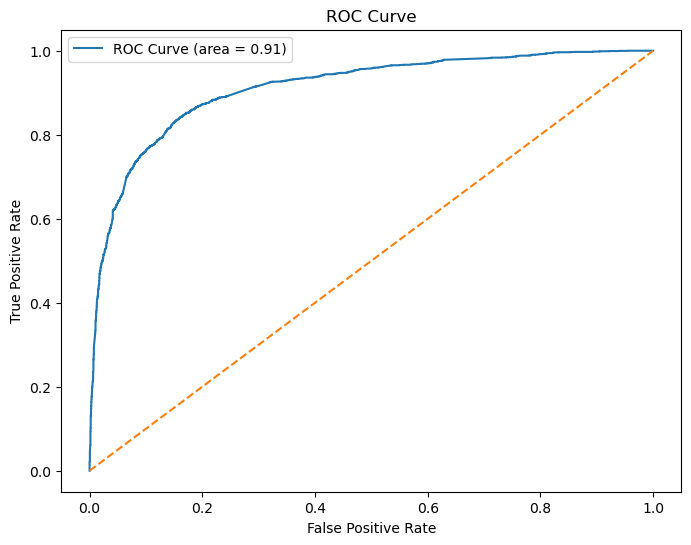

In [93]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

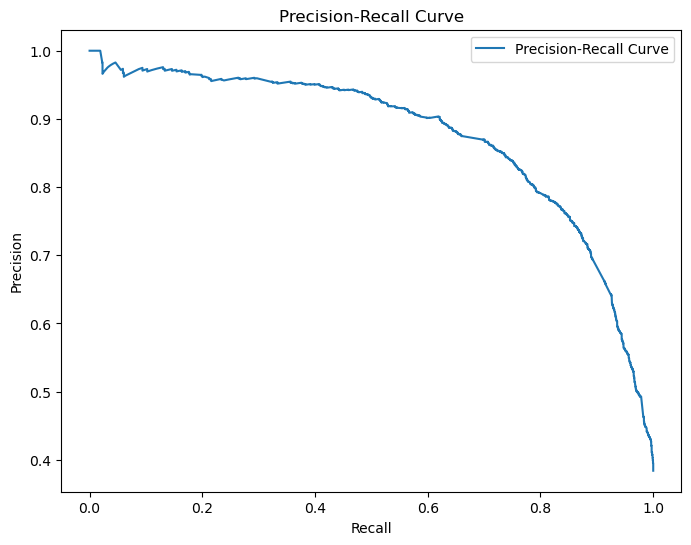

In [94]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_train, y_train_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

-  **Residual Analysis**

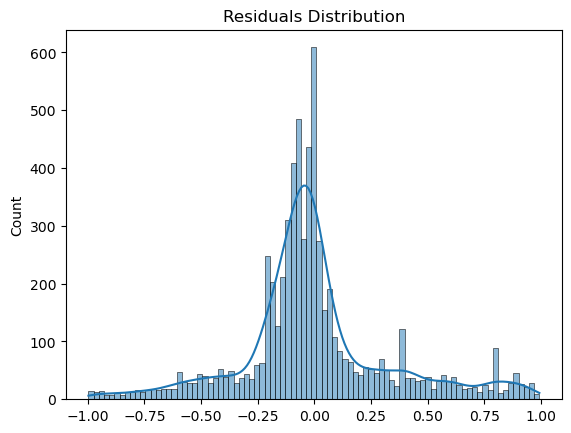

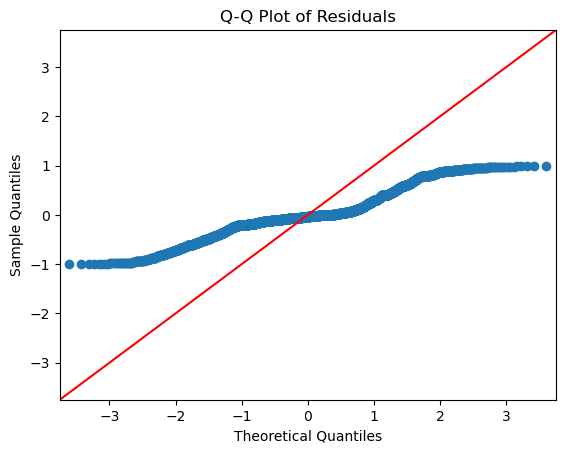

In [95]:
# Calculate residuals
residuals = y_train - y_train_pred_prob

# Plot residuals distribution
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Q-Q Plot to check normality
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

## Model-3

In [96]:
col1 = col1.drop('Last Notable Activity_had a phone conversation')

-  **Initial Model Training**

In [97]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2355.6
Date:                Wed, 31 Jul 2024   Deviance:                       4711.2
Time:                        19:24:19   Pearson chi2:                 8.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4532
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.7545      0.322     11.663      0.000       3.124       4.385
Do Not Email                                            -1.5503      0.172     -8.991      0.000      -1.888      -1.212
Total Time Spent on Website                              1.0467      0.042     24.662      0.000       0.964       1.130
Lead Origin_lead add form                                3.2384      0.206     15.734      0.000       2.835       3.642
Lead Source_olark chat                                   0.9960      0.109      9.134      0.000       0.782       1.210
Last Activity_converted to lead                         -1.1179      0.236     -4.735      0.000      -1.581      -0.655
Last Activity_olark chat conversation                   -1.1783      0.196     -6.017      0.000      -1.562      -0.795
Specialization_hospitality management                   -1.1054      0.380     -2.910      0.004      -1.850      -0.361
What is your current occupation_unemployed              -0.7796      0.297     -2.621      0.009      -1.363      -0.197
What is your current occupation_working professional     1.5607      0.355      4.399      0.000       0.865       2.256
Lead Quality_might be                                   -2.6140      0.134    -19.543      0.000      -2.876      -2.352
Lead Quality_not sure                                   -3.3528      0.167    -20.046      0.000      -3.681      -3.025
Lead Quality_worst                                      -5.2653      0.383    -13.742      0.000      -6.016      -4.514
Asymmetrique Activity Index_03.low                      -1.7799      0.293     -6.082      0.000      -2.353      -1.206
Last Notable Activity_email link clicked                -1.9399      0.275     -7.044      0.000      -2.480      -1.400
Last Notable Activity_email opened                      -1.7929      0.097    -18.541      0.000      -1.982      -1.603
Last Notable Activity_modified                          -1.8737      0.107    -17.517      0.000      -2.083      -1.664
Last Notable Activity_olark chat conversation           -1.9824      0.395     -5.015      0.000      -2.757      -1.208
Last Notable Activity_page visited on website           -1.7093      0.208     -8.201      0.000      -2.118      -1.301
========================================================================================================================
"""

**Checking for VIF values**

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_unemployed,10.35
9,Lead Quality_might be,6.23
15,Last Notable Activity_modified,3.03
14,Last Notable Activity_email opened,2.22
5,Last Activity_olark chat conversation,2.00
10,Lead Quality_not sure,1.96
3,Lead Source_olark chat,1.80
8,What is your current occupation_working profes...,1.70
11,Lead Quality_worst,1.46
16,Last Notable Activity_olark chat conversation,1.38


-  **Model Evaluation**

In [99]:
# Model Predictions
y_train_pred_prob = res.predict(X_train_sm)
y_train_pred = np.where(y_train_pred_prob >= 0.5, 1, 0)

In [100]:
# Accuracy
accuracy3 = accuracy_score(y_train, y_train_pred)
print(f'Accuracy: {accuracy3}')

Accuracy: 0.8474025974025974


In [101]:
# Precision
precision3 = precision_score(y_train, y_train_pred)
print(f'Precision: {precision3}')

Precision: 0.8264282599215003


In [102]:
#recall
recall3 = recall_score(y_train, y_train_pred)
print(f'recall: {recall3}')

recall: 0.7628824476650563


In [103]:
# F1 Score
f13 = f1_score(y_train, y_train_pred)
print(f'F1 Score: {f13}')

F1 Score: 0.7933849696462214


In [104]:
# ROC AUC
roc_auc3 = roc_auc_score(y_train, y_train_pred_prob)
print(f'ROC AUC: {roc_auc3}')

ROC AUC: 0.9108314295830666


In [105]:
# Confusion Matrix
conf_matrix3 = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix:\n', conf_matrix3)

Confusion Matrix:
 [[3586  398]
 [ 589 1895]]


In [106]:
# Classification Report
class_report = classification_report(y_train, y_train_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      3984
           1       0.83      0.76      0.79      2484

    accuracy                           0.85      6468
   macro avg       0.84      0.83      0.84      6468
weighted avg       0.85      0.85      0.85      6468



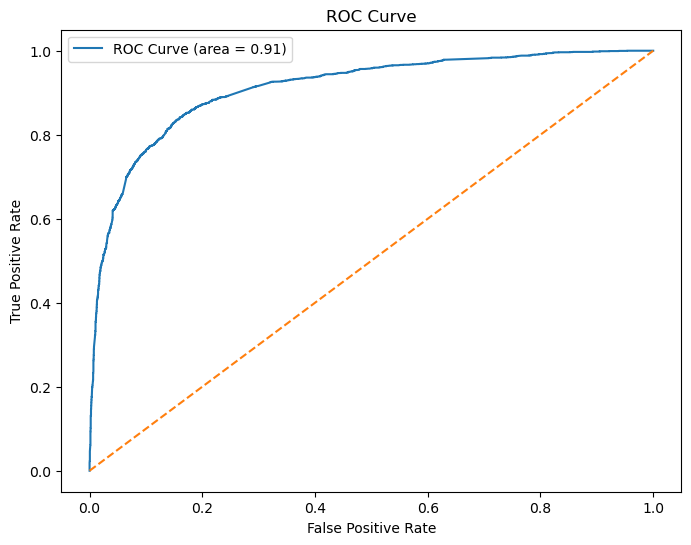

In [107]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

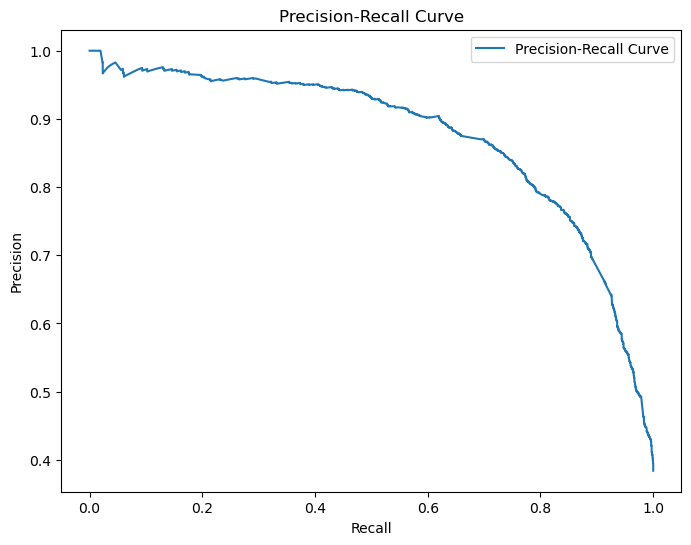

In [108]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_train, y_train_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

-  **Residual Analysis**

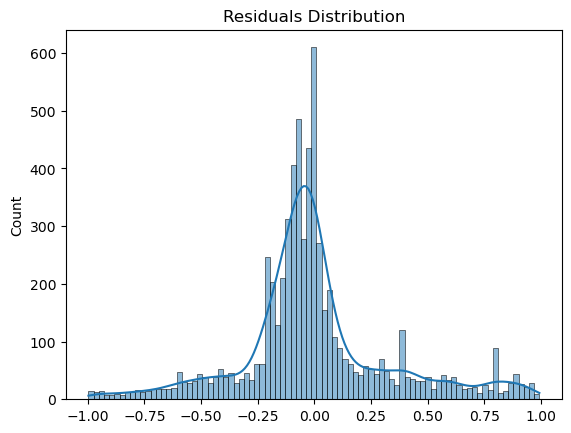

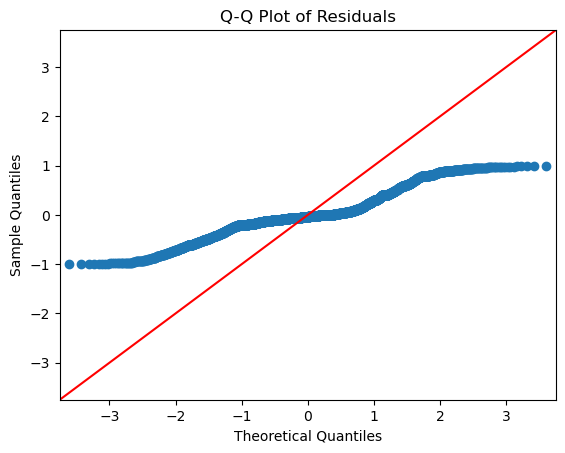

In [109]:
# Calculate residuals
residuals = y_train - y_train_pred_prob

# Plot residuals distribution
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Q-Q Plot to check normality
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

## Model-4

In [110]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_unemployed')

In [111]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2359.1
Date:                Wed, 31 Jul 2024   Deviance:                       4718.2
Time:                        19:24:26   Pearson chi2:                 8.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4526
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.0171      0.149     20.301      0.000       2.726       3.308
Do Not Email                                            -1.5474      0.173     -8.966      0.000      -1.886      -1.209
Total Time Spent on Website                              1.0481      0.042     24.706      0.000       0.965       1.131
Lead Origin_lead add form                                3.2420      0.206     15.773      0.000       2.839       3.645
Lead Source_olark chat                                   0.9949      0.109      9.136      0.000       0.782       1.208
Last Activity_converted to lead                         -1.1076      0.236     -4.699      0.000      -1.570      -0.646
Last Activity_olark chat conversation                   -1.1735      0.195     -6.009      0.000      -1.556      -0.791
Specialization_hospitality management                   -1.1152      0.379     -2.940      0.003      -1.859      -0.372
What is your current occupation_working professional     2.3264      0.201     11.558      0.000       1.932       2.721
Lead Quality_might be                                   -2.6488      0.133    -19.868      0.000      -2.910      -2.388
Lead Quality_not sure                                   -3.3851      0.167    -20.270      0.000      -3.712      -3.058
Lead Quality_worst                                      -5.1839      0.382    -13.581      0.000      -5.932      -4.436
Asymmetrique Activity Index_03.low                      -1.7843      0.292     -6.120      0.000      -2.356      -1.213
Last Notable Activity_email link clicked                -1.9247      0.275     -7.007      0.000      -2.463      -1.386
Last Notable Activity_email opened                      -1.7912      0.097    -18.540      0.000      -1.981      -1.602
Last Notable Activity_modified                          -1.8738      0.107    -17.526      0.000      -2.083      -1.664
Last Notable Activity_olark chat conversation           -1.9967      0.395     -5.051      0.000      -2.771      -1.222
Last Notable Activity_page visited on website           -1.7083      0.208     -8.195      0.000      -2.117      -1.300
========================================================================================================================
"""

**Checking for VIF values**

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lead Quality_might be,2.74
14,Last Notable Activity_modified,2.59
5,Last Activity_olark chat conversation,2.00
3,Lead Source_olark chat,1.76
13,Last Notable Activity_email opened,1.74
15,Last Notable Activity_olark chat conversation,1.35
10,Lead Quality_worst,1.28
4,Last Activity_converted to lead,1.24
1,Total Time Spent on Website,1.22
9,Lead Quality_not sure,1.21


**Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-4 is our final model. We have 17 variables in our final model.**

**Making Prediction on the Train set**

In [113]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4715    0.204533
7132    0.935810
8954    0.363780
5283    0.095821
3003    0.537574
478     0.068224
1352    0.583304
3166    0.911011
7700    0.155733
2647    0.012145
dtype: float64

In [114]:
#Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
4715,0,0.204533,4715
7132,1,0.935810,7132
8954,0,0.363780,8954
5283,0,0.095821,5283
3003,0,0.537574,3003


In [115]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.tail()

,Converted,Converted_prob,Prospect ID,predicted
5734,0,0.108629,5734,0
5191,0,0.068224,5191,0
5390,1,0.995174,5390,1
860,0,0.021977,860,0
7270,1,0.750696,7270,1


-  **Model Evaluation**

In [116]:
# Confusion matrix 
confusion4 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion4)

[[3583  401]
 [ 584 1900]]


In [117]:
# Accuracy
accuracy4 = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(f'Accuracy: {accuracy4}')

Accuracy: 0.8477118119975263


In [118]:
# Metrics beyond simply accuracy
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [119]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7648953301127214


In [120]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8993473895582329


In [121]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.10065261044176707


In [122]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.8257279443720121


In [123]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8598512119030478


In [124]:
#precision
precision4 = precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(f'Precision: {precision4}')

Precision: 0.8257279443720121


In [125]:
#recall
recall4 = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(f'recall: {recall4}')

recall: 0.7648953301127214


In [126]:
# F1 Score
f14= f1_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(f'F1 Score: {f14}')

F1 Score: 0.7941483803552769


In [127]:
# ROC AUC
roc_auc4 = roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(f'ROC AUC: {roc_auc4}')


ROC AUC: 0.8321213598354771


In [128]:
# Classification Report
class_report = classification_report(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      3984
           1       0.83      0.76      0.79      2484

    accuracy                           0.85      6468
   macro avg       0.84      0.83      0.84      6468
weighted avg       0.85      0.85      0.85      6468



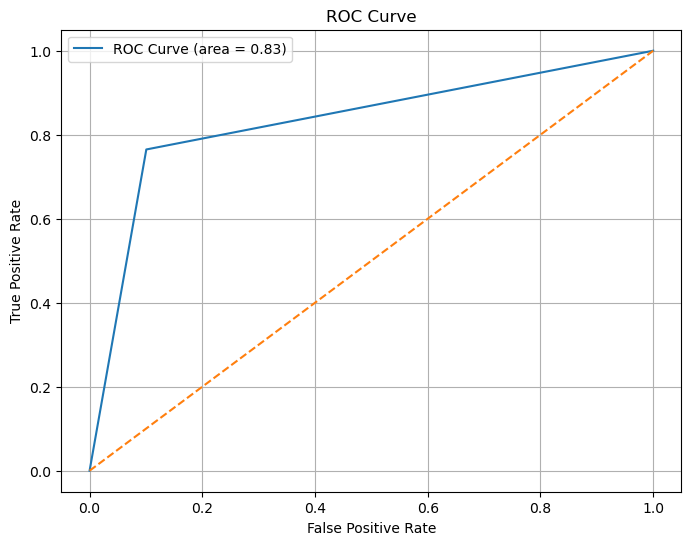

In [129]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train_pred_final.Converted, y_train_pred_final.predicted)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

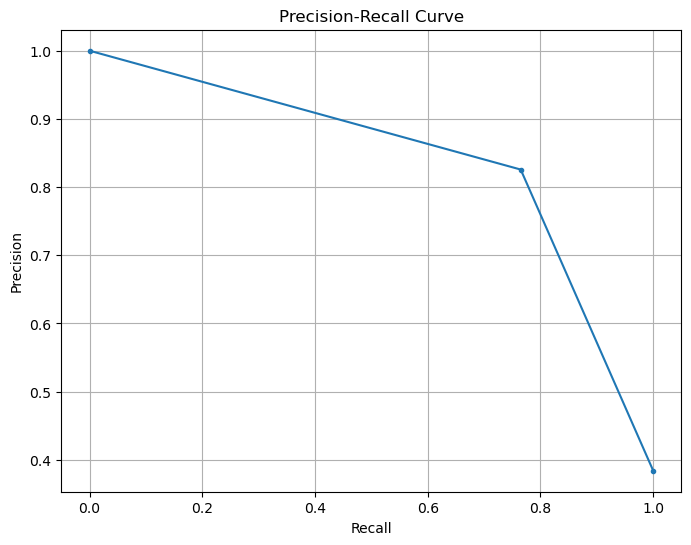

In [130]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.predicted)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

-  **Residual Analysis**

In [131]:
# Residuals: Assuming 'predicted_prob' column contains predicted probabilities
y_train_pred_final['residuals'] = y_train_pred_final['Converted'] - y_train_pred_final['predicted']

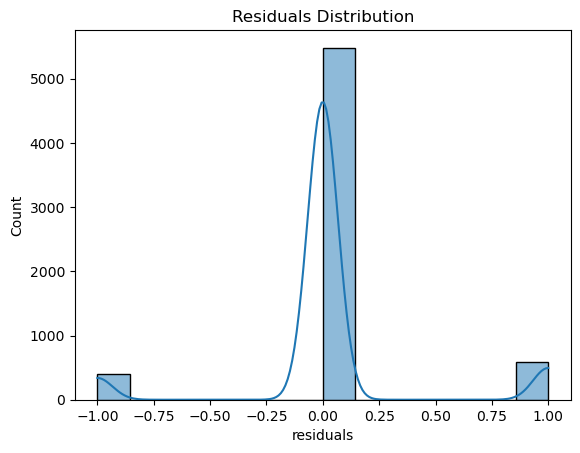

In [132]:
# Plot residuals distribution
sns.histplot(y_train_pred_final['residuals'], kde=True)
plt.title('Residuals Distribution')
plt.show()

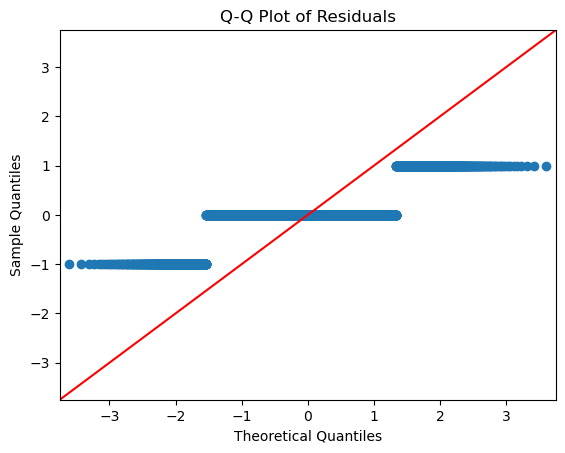

In [133]:
# Q-Q Plot to check normality of residuals
sm.qqplot(y_train_pred_final['residuals'], line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

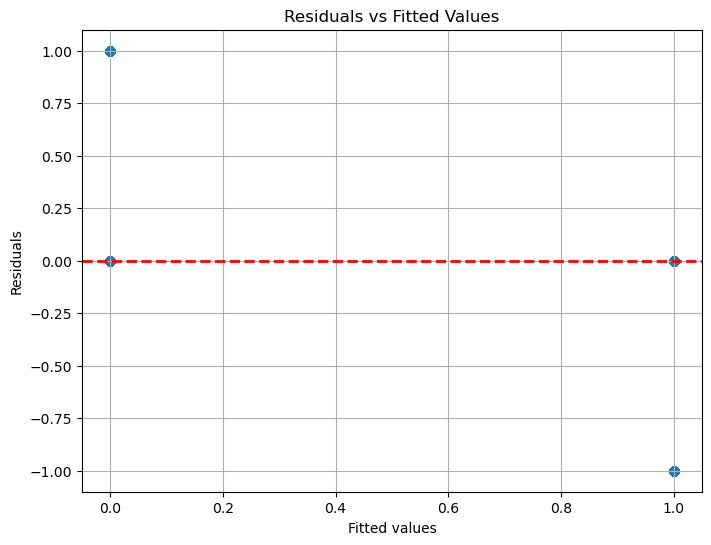

In [135]:
# Residuals vs Fitted Values Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred_final['predicted'], y_train_pred_final['residuals'], alpha=0.5)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [140]:
# Create a dictionary to store the results
results = {
    "Metric": ["Confusion Matrix", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
    "Model 1": [conf_matrix1, accuracy1, precision1, recall1, f11, roc_auc1],
    "Model 2": [conf_matrix2, accuracy2, precision2, recall2, f12, roc_auc2],
    "Model 3": [conf_matrix3, accuracy3, precision3, recall3, f13, roc_auc3],
    "Model 4": [confusion4, accuracy4, precision4, recall4, f14, roc_auc4]}

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

             Metric                     Model 1                     Model 2  \
0  Confusion Matrix  [[3585, 399], [590, 1894]]  [[3586, 398], [594, 1890]]   
1          Accuracy                    0.847093                     0.84663   
2         Precision                    0.825992                    0.826049   
3            Recall                     0.76248                     0.76087   
4          F1 Score                    0.792966                    0.792121   
5           ROC AUC                    0.911585                    0.910872   

                      Model 3                     Model 4  
0  [[3586, 398], [589, 1895]]  [[3583, 401], [584, 1900]]  
1                    0.847403                    0.847712  
2                    0.826428                    0.825728  
3                    0.762882                    0.764895  
4                    0.793385                    0.794148  
5                    0.910831                    0.832121  


In [141]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3583      401
# converted            584       1900 

<B> <FONT COLOR='GREEN'>The model 4 is particularly effective in identifying potential conversions, as evidenced by its confusion matrix. Out of 2,484 actual converted leads, the model correctly identified 1,900, achieving a high sensitivity (Recall). This suggests that the model is well-suited for the task of focusing on leads likely to convert, allowing the team to prioritize efforts on these high-potential prospects. The relatively low number of false negatives (584) indicates that the model captures the majority of those who can be converted, making it the best among all models for this purpose. so we will use Model 4 </B> </FONT>

## 11. Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [142]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,residuals,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4715,0,0.204533,4715,0,0,1,1,1,0,0,0,0,0,0,0
7132,1,0.935810,7132,1,0,1,1,1,1,1,1,1,1,1,1
8954,0,0.363780,8954,0,0,1,1,1,1,0,0,0,0,0,0
5283,0,0.095821,5283,0,0,1,0,0,0,0,0,0,0,0,0
3003,0,0.537574,3003,1,-1,1,1,1,1,1,1,0,0,0,0


In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.660946  0.964171  0.471888
0.2   0.2  0.787415  0.913043  0.709086
0.3   0.3  0.831942  0.861514  0.813504
0.4   0.4  0.841373  0.817633  0.856175
0.5   0.5  0.847712  0.764895  0.899347
0.6   0.6  0.844156  0.701691  0.932982
0.7   0.7  0.821274  0.599436  0.959588
0.8   0.8  0.795455  0.505233  0.976406
0.9   0.9  0.758349  0.391304  0.987199


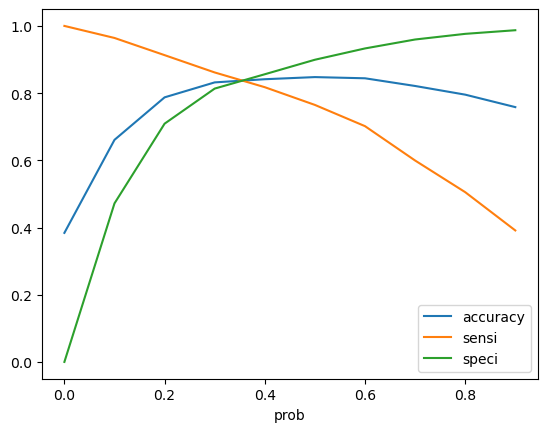

In [144]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [145]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,residuals,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4715,0,0.204533,4715,0,0,1,1,1,0,0,0,0,0,0,0,0
7132,1,0.935810,7132,1,0,1,1,1,1,1,1,1,1,1,1,1
8954,0,0.363780,8954,0,0,1,1,1,1,0,0,0,0,0,0,1
5283,0,0.095821,5283,0,0,1,0,0,0,0,0,0,0,0,0,0
3003,0,0.537574,3003,1,-1,1,1,1,1,1,1,0,0,0,0,1


## 12. Assigning Lead Score to the Training data

In [146]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,residuals,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
4715,0,0.204533,4715,0,0,1,1,1,0,0,0,0,0,0,0,0,20
7132,1,0.935810,7132,1,0,1,1,1,1,1,1,1,1,1,1,1,94
8954,0,0.363780,8954,0,0,1,1,1,1,0,0,0,0,0,0,1,36
5283,0,0.095821,5283,0,0,1,0,0,0,0,0,0,0,0,0,0,10
3003,0,0.537574,3003,1,-1,1,1,1,1,1,1,0,0,0,0,1,54


-  **Model Evaluation**

In [153]:
# Let's check the overall accuracy.
accuracy5=("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print(accuracy5)

('Accuracy :', 0.8370439084724799)


In [154]:
# Confusion matrix
confusion5 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion5

array([[3306,  678],
       [ 376, 2108]], dtype=int64)

In [155]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives 
FN = confusion5[1,0] # false negatives

In [157]:
# Let's see the sensitivity of our logistic regression model
sensitivity=("Sensitivity : ",TP / float(TP+FN))
print(sensitivity)

('Sensitivity : ', 0.8486312399355878)


In [158]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8298192771084337


In [159]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.17018072289156627


In [160]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.756640344580043


In [161]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8978815860945139


In [165]:
# Precision
TP / TP + FP

Precision5=("Precision : ",confusion5[1,1]/(confusion5[0,1]+confusion5[1,1]))
print(Precision5)

('Precision : ', 0.756640344580043)


In [166]:
# Recall
TP / TP + FN

recall5=("Recall :",confusion5[1,1]/(confusion5[1,0]+confusion5[1,1]))
print(recall5)

('Recall :', 0.8486312399355878)


In [167]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

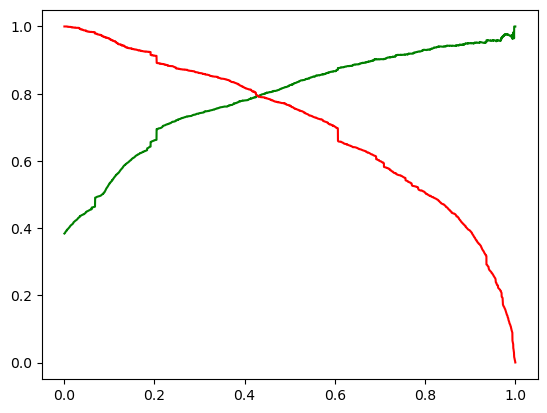

In [168]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**The above graph shows the trade-off between the Precision and Recall.**

## 13. Making predictions on the test set

### Scaling the test data

In [169]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [170]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()


,Do Not Email,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Last Activity_converted to lead,Last Activity_olark chat conversation,Specialization_hospitality management,What is your current occupation_working professional,Lead Quality_might be,Lead Quality_not sure,Lead Quality_worst,Asymmetrique Activity Index_03.low,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
4608,0,-0.428249,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7935,1,0.805598,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4043,1,-0.883879,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7821,0,-0.298850,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
856,0,-0.521198,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [171]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4608    0.133335
7935    0.098976
4043    0.018354
7821    0.463557
856     0.122474
927     0.047834
318     0.996151
1018    0.057075
8151    0.373763
1570    0.958217
dtype: float64

In [172]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [173]:
# Let's see the head
y_pred_1.head()

,0
4608,0.133335
7935,0.098976
4043,0.018354
7821,0.463557
856,0.122474


In [174]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [175]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [176]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [178]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4608,0.133335
1,0,7935,0.098976
2,0,4043,0.018354
3,0,7821,0.463557
4,0,856,0.122474


In [179]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [180]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [187]:
# Let's see the tail of y_pred_final
y_pred_final.tail(10)

,Prospect ID,Converted,Converted_prob,final_predicted
2762,7116,1,0.769946,1
2763,8979,0,0.283789,0
2764,4240,1,0.777766,1
2765,5620,0,0.046839,0
2766,7036,1,0.986193,1
2767,4184,0,0.097265,0
2768,5023,0,0.031452,0
2769,6661,0,0.005770,0
2770,2201,0,0.033478,0
2771,1160,0,0.008452,0


In [184]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [186]:
y_pred_final.tail()

,Prospect ID,Converted,Converted_prob,final_predicted
2767,4184,0,0.097265,0
2768,5023,0,0.031452,0
2769,6661,0,0.005770,0
2770,2201,0,0.033478,0
2771,1160,0,0.008452,0


In [188]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.836940836940837


In [189]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1393,  302],
       [ 150,  927]], dtype=int64)

In [190]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [191]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8607242339832869


In [192]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8218289085545722


In [195]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,4608,1,0.133335,0,13
1,7935,0,0.098976,0,10
2,4043,0,0.018354,0,2
3,7821,0,0.463557,1,46
4,856,0,0.122474,0,12


**Observations:**
After running the model on the Test Data , we obtain:

-  **Accuracy : 83.6 %**
-  **Sensitivity : 86.0 %**
-  **Specificity : 82.1 %**

## 14. Results

## 1) Comparing the values obtained for Train & Test:

**Train Data:**

-  Accuracy : 83.7 %
-  Sensitivity : 84.8 %  
-  Specificity : 82.9 %

**Test Data:**

-  Accuracy : 83.6 %
-  Sensitivity : 86.0 %
-  Specificity : 82.1 %

<B> <FONT COLOR='GREEN'>Thus we have achieved our goal of getting a ballpark of the target lead conversion rate is more than 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.</B> </FONT>

### 2) Finding out the leads which should be contacted:


**The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.**

In [196]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
6,318,1,0.996151,1,100
9,1570,1,0.958217,1,96
10,8086,1,0.978336,1,98
15,1840,1,0.878119,1,88
16,6157,1,0.990660,1,99
...,...,...,...,...,...
2734,1831,1,0.957723,1,96
2740,6710,1,0.889809,1,89
2747,7288,1,0.940442,1,94
2749,2314,1,0.858936,1,86


<B> <FONT COLOR='GREEN'>So there are 573 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :</B> </FONT>

In [197]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([ 318, 1570, 8086, 1840, 6157, 8030, 2952, 6851, 1631, 1568, 4816,
       3290, 1561, 7042, 5505, 5688, 1957, 1446, 3412, 7840, 1965, 6501,
       8687, 3721,   76, 1780, 8504, 6119, 9107, 4157, 3777, 1010, 2574,
       1318, 6712, 4123, 7719, 5470, 1730, 7636, 2273, 1512, 4707, 2067,
       8184, 6309,  623, 8884, 8282, 3033,   88, 7212, 1614, 3937, 2018,
       1199,  764, 6977, 1559, 1263, 8161, 4313, 5314, 5559, 1978, 2316,
       4252, 8816, 7993, 6666, 1803, 1897, 2614, 5363,  267, 4002, 5395,
       7448, 6676, 6126, 2473, 5720, 2726, 2760, 3723, 7725, 6663, 8499,
       9108, 1339, 4387, 3123, 1188, 2272, 3761, 5474, 3625, 2673, 2900,
       4080, 8946,  582, 5071, 9043, 7503, 8078, 3703,  212, 7653, 7082,
       1406, 6728, 4734, 4487,  353, 7166, 2115, 5167, 6170, 1915, 8113,
       7853, 6550, 2835, 5685, 2519, 1313, 2680, 9068, 6134, 1046, 8749,
       4607, 4772, 5817, 5206, 6754, 4230, 9233, 3582, 4003, 4250, 6811,
       5911, 5653, 1617, 3150, 4057, 3532, 2692, 87

## 3) Finding out the Important Features from our final model:

In [198]:
res.params.sort_values(ascending=False)

Lead Origin_lead add form                               3.241959
const                                                   3.017080
What is your current occupation_working professional    2.326409
Total Time Spent on Website                             1.048084
Lead Source_olark chat                                  0.994948
Last Activity_converted to lead                        -1.107568
Specialization_hospitality management                  -1.115232
Last Activity_olark chat conversation                  -1.173468
Do Not Email                                           -1.547412
Last Notable Activity_page visited on website          -1.708281
Asymmetrique Activity Index_03.low                     -1.784327
Last Notable Activity_email opened                     -1.791193
Last Notable Activity_modified                         -1.873820
Last Notable Activity_email link clicked               -1.924711
Last Notable Activity_olark chat conversation          -1.996727
Lead Quality_might be    

## 15. Recommendations

-  <b> The company <FONT COLOR='GREEN'>should make calls</FONT> to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
-  <b>The company <FONT COLOR='GREEN'>should make calls</FONT> to the leads who are the "working professionals" as they are more likely to get converted.
-  <b>The company <FONT COLOR='GREEN'>should make calls</FONT> to the leads who spent "more time on the websites" as these are more likely to get converted.
-  <b>The company <FONT COLOR='GREEN'>should make calls</FONT> to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
-  <b>The company <FONT COLOR='GREEN'>should make calls</FONT> to the leads whose last activity was SMS Sent as they are more likely to get converted.

-  <b>The company <FONT COLOR='RED'>should not make calls</FONT> to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

-  <b>The company <FONT COLOR='RED'>should not make calls</FONT> to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
-  <b>The company <FONT COLOR='RED'>should not make calls</FONT> to the leads whose Specialization was "Others" as they are not likely to get converted.
-  <b>The company <FONT COLOR='RED'>should not make calls</FONT> to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.